# Latar Belakang


Memasuki akhir tahun 2024, Carrefour menghadapi persaingan yang semakin ketat, khususnya dalam pengelolaan biaya pemasaran. Selama ini strategi promosi masih dijalankan secara umum tanpa membedakan karakteristik pelanggan, sehingga biaya pemasaran menjadi tinggi namun tidak sebanding dengan hasil yang diperoleh. Padahal, sebagian besar revenue justru berasal dari kelompok pelanggan tertentu yang bernilai tinggi, sehingga pemahaman yang lebih baik mengenai segmentasi pelanggan sangat dibutuhkan untuk meningkatkan efektivitas promosi sekaligus menekan biaya yang tidak perlu.

Selain itu, pola pembelian menunjukkan bahwa tiap segmen pelanggan memiliki preferensi produk yang berbeda. Namun, promosi yang dilakukan masih bersifat umum tanpa mempertimbangkan relevansi produk bagi segmen tertentu. Akibatnya, efektivitas promosi menurun dan peluang untuk mendorong penjualan produk-produk unggulan tidak dimanfaatkan secara optimal.

Tidak hanya itu, perbedaan perilaku belanja melalui berbagai channel pembelian (toko fisik, katalog, maupun online/web) juga belum pernah dievaluasi secara mendalam. Padahal, efektivitas saluran pembelian sangat penting karena loyalitas pelanggan sering kali dipengaruhi oleh channel yang mereka gunakan. Jika perusahaan mengetahui channel mana yang paling berkontribusi terhadap penjualan dan retensi pelanggan, maka strategi pemasaran bisa lebih difokuskan pada channel yang terbukti memberikan hasil terbaik, sekaligus mengurangi pemborosan biaya pada channel yang kurang efektif.

Dengan memanfaatkan data pelanggan tahun 2024 yang mencakup informasi demografi, perilaku belanja, saluran pembelian, hingga respons terhadap kampanye, Carrefour memiliki peluang besar untuk melakukan analisis segmentasi. Hasil analisis ini akan menjadi dasar strategi pemasaran yang lebih tepat sasaran: mengurangi biaya, meningkatkan retensi pelanggan, dan memastikan produk yang dipromosikan sesuai dengan segmen yang paling potensial.

## Stakeholder

Tim Manajemen Bisnis dan Analisis Carrefour sebagai stakeholder utama. Mereka bertanggung jawab untuk mengevaluasi strategi bisnis yang berkaitan dengan pelanggan, produk, dan channel distribusi yang dimiliki perusahaan.

## Permasalahan utama:

1. Bagaimana cara mengurangi pengeluaran pemasaran dengan melakukan segmentasi pelanggan?
2. Produk mana yang paling relevan untuk dipromosikan ke segmen pelanggan tertentu?
3. Channel pembelian mana yang paling berkontribusi pada penjualan & loyalitas pelanggan?


## Goal
1. Mengidentifikasi segmen pelanggan yang paling bernilai tinggi untuk difokuskan dalam strategi promosi.
2. Menentukan produk-produk yang paling relevan untuk masing-masing segmen pelanggan.
3. Mengevaluasi channel pembelian (toko fisik, katalog, online) yang paling efektif dalam meningkatkan penjualan dan retensi pelanggan.

## Analytical Approach
1. **Data Understanding & Preprocessing**
   - Mengecek tipe data, missing value, outlier, dan anomali.  
   - Membersihkan data:
     - Imputasi pendapatan (`Income`) yang hilang dan menangani outlier.  
     - Mengonversi tahun lahir menjadi umur dengan rentang wajar (18–100).  
     - Normalisasi kategori `Marital_Status`.  
     - Konversi tanggal pelanggan (`Dt_Customer`) ke format datetime dan menghitung *tenure*.  
   - Feature engineering:
     - Membuat variabel **`Total_Spending`**.  
     - Membuat variabel **`OverallResponse`** dari hasil kampanye.  

2. **Analisis Segmentasi Pelanggan**
   - Membandingkan karakteristik pelanggan yang merespons vs tidak merespons kampanye.  
   - Menggunakan metode statistik dan clustering untuk membentuk segmen pelanggan berdasarkan perilaku belanja, demografi, dan pendapatan.  

3. **Analisis Produk**
   - Menganalisis pola pengeluaran pelanggan pada kategori produk (wine, daging, buah, ikan, manisan, emas).  
   - Mengidentifikasi produk yang relevan untuk tiap segmen pelanggan.  

4. **Analisis Channel Pembelian**
   - Mengevaluasi kontribusi berbagai channel (toko fisik, katalog, online/web).  
   - Mengkaji hubungan antara karakteristik pelanggan dengan preferensi channel.  

5. **Sintesis & Rekomendasi Strategis (akhir)**
   - Mengintegrasikan hasil segmentasi pelanggan, analisis produk, dan analisis channel untuk merancang strategi pemasaran yang lebih tepat sasaran.  


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=drive_link). 

In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway, pearsonr


import warnings
warnings.filterwarnings("ignore")

## Dataset Description - Supermarket Customers

Berikut penjelasan tiap kolom dalam dataset:
- **ID** → Identitas unik setiap pelanggan.  
- **Year_Birth** → Tahun kelahiran pelanggan.  
- **Education** → Tingkat pendidikan pelanggan.  
- **Marital_Status** → Status pernikahan pelanggan.  
- **Income** → Pendapatan tahunan rumah tangga pelanggan.  
- **Kidhome** → Jumlah anak kecil (kids) di rumah pelanggan.  
- **Teenhome** → Jumlah remaja (teens) di rumah pelanggan.  
- **Dt_Customer** → Tanggal pelanggan mulai bergabung dengan perusahaan.  
- **Recency** → Jumlah hari sejak pembelian terakhir pelanggan.  

 Spending (dalam 2 tahun terakhir)
- **MntWines** → Jumlah uang yang dihabiskan untuk wine.  
- **MntFruits** → Jumlah uang yang dihabiskan untuk buah-buahan.  
- **MntMeatProducts** → Jumlah uang yang dihabiskan untuk daging.  
- **MntFishProducts** → Jumlah uang yang dihabiskan untuk ikan.  
- **MntSweetProducts** → Jumlah uang yang dihabiskan untuk permen/manisan.  
- **MntGoldProds** → Jumlah uang yang dihabiskan untuk emas.  

Purchases & Channels
- **NumDealsPurchases** → Jumlah pembelian menggunakan diskon.  
- **NumWebPurchases** → Jumlah pembelian melalui website.  
- **NumCatalogPurchases** → Jumlah pembelian melalui katalog.  
- **NumStorePurchases** → Jumlah pembelian langsung di toko.  
- **NumWebVisitsMonth** → Jumlah kunjungan ke website perusahaan dalam sebulan terakhir.  

 Marketing Campaigns
- **AcceptedCmp1** → 1 jika pelanggan menerima penawaran campaign ke-1, 0 jika tidak.  
- **AcceptedCmp2** → 1 jika pelanggan menerima penawaran campaign ke-2, 0 jika tidak.  
- **AcceptedCmp3** → 1 jika pelanggan menerima penawaran campaign ke-3, 0 jika tidak.  
- **AcceptedCmp4** → 1 jika pelanggan menerima penawaran campaign ke-4, 0 jika tidak.  
- **AcceptedCmp5** → 1 jika pelanggan menerima penawaran campaign ke-5, 0 jika tidak.  
- **Response** → 1 jika pelanggan menerima penawaran pada campaign terakhir, 0 jika tidak.  

 Others
- **Complain** → 1 jika pelanggan pernah melakukan komplain dalam 2 tahun terakhir, 0 jika tidak.  
- **Z_CostContact** → Variabel konstanta (tidak relevan untuk analisis).  
- **Z_Revenue** → Variabel konstanta (tidak relevan untuk analisis).  


In [506]:
df = pd.read_csv("Supermarket Customers.csv", sep="\t")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [507]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Data Understanding



Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

## Check Datatype

In [508]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

## Check Statistic Descriptive

In [509]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## Check Duplikat

In [510]:
df.duplicated().sum()

np.int64(0)

## Check Unique Value 

In [511]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

## Check Missing Value

In [512]:
# persentase missing value di tiap kolom
df_null=pd.DataFrame(round(100*df.isna().sum()/len(df),2)).rename(columns={0:'Null Percentage'}).astype(str)+' %'
df_null['Null Count']=df.isna().sum()
df_null

,Null Percentage,Null Count
ID,0.0 %,0
Year_Birth,0.0 %,0
Education,0.0 %,0
Marital_Status,0.0 %,0
Income,1.07 %,24
Kidhome,0.0 %,0
Teenhome,0.0 %,0
Dt_Customer,0.0 %,0
Recency,0.0 %,0
MntWines,0.0 %,0


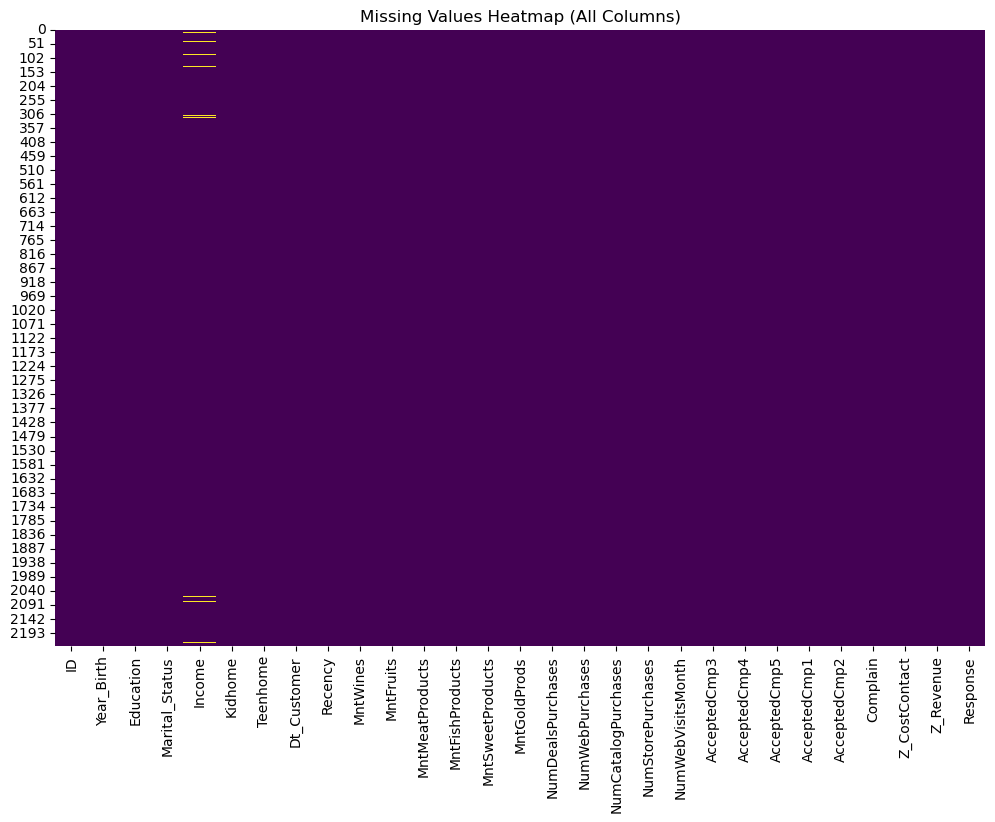

In [513]:
# # Sebaran missing value di dalam data
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (All Columns)")
plt.show()


## Check Distribution

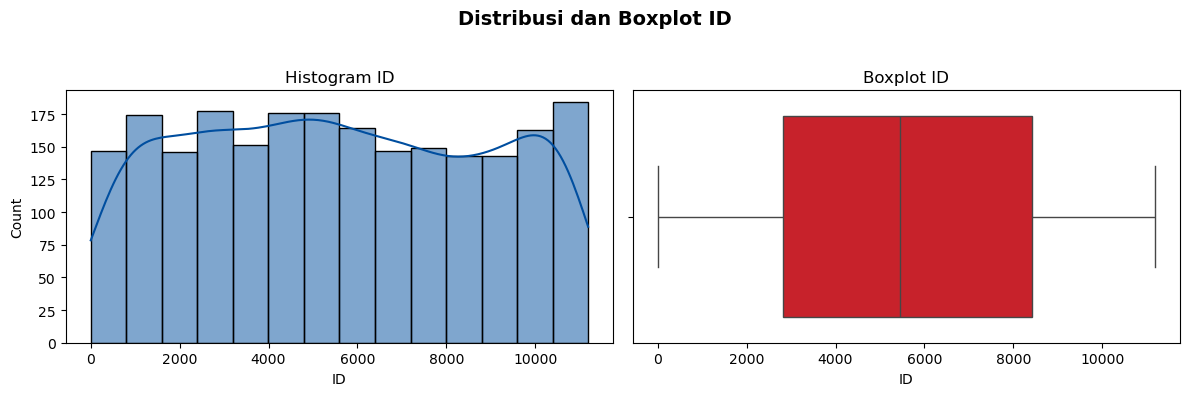

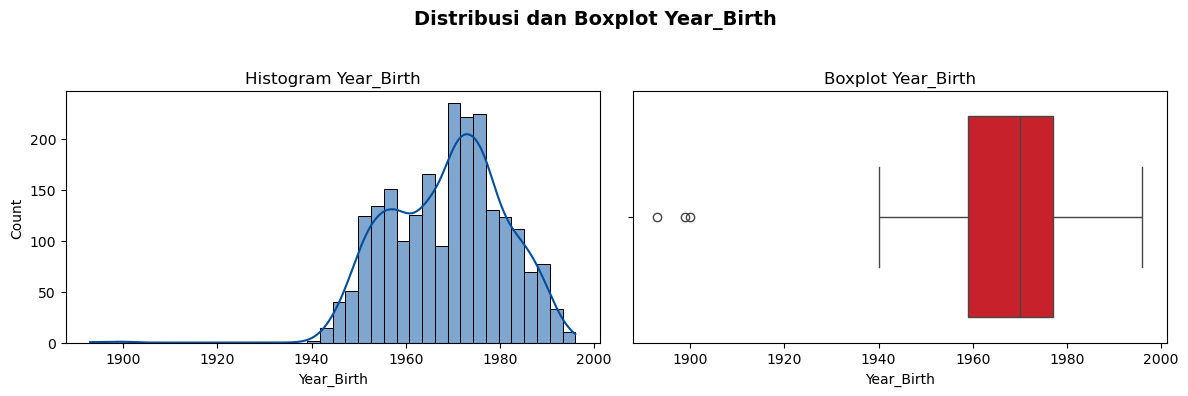

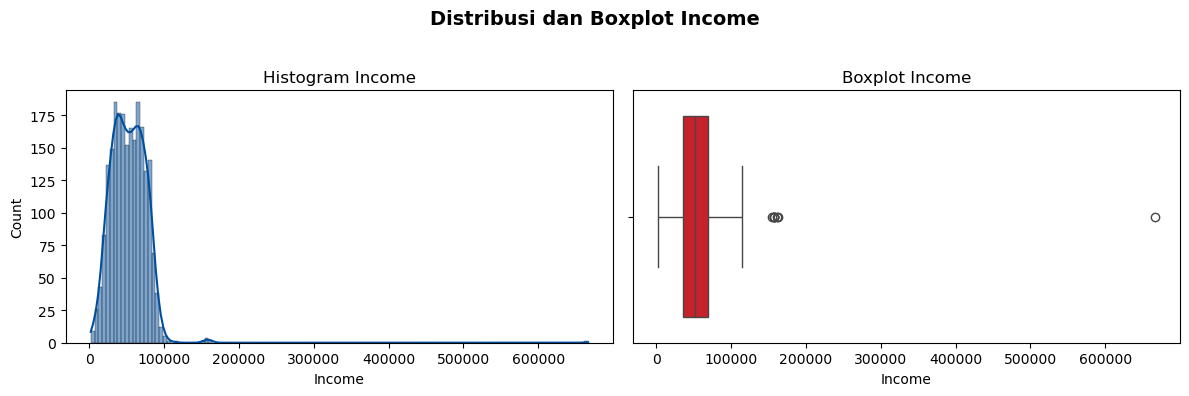

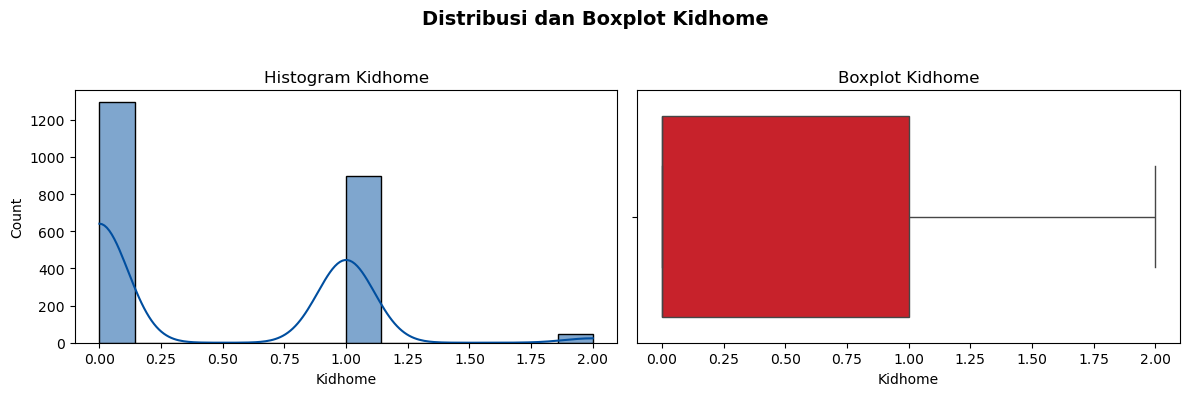

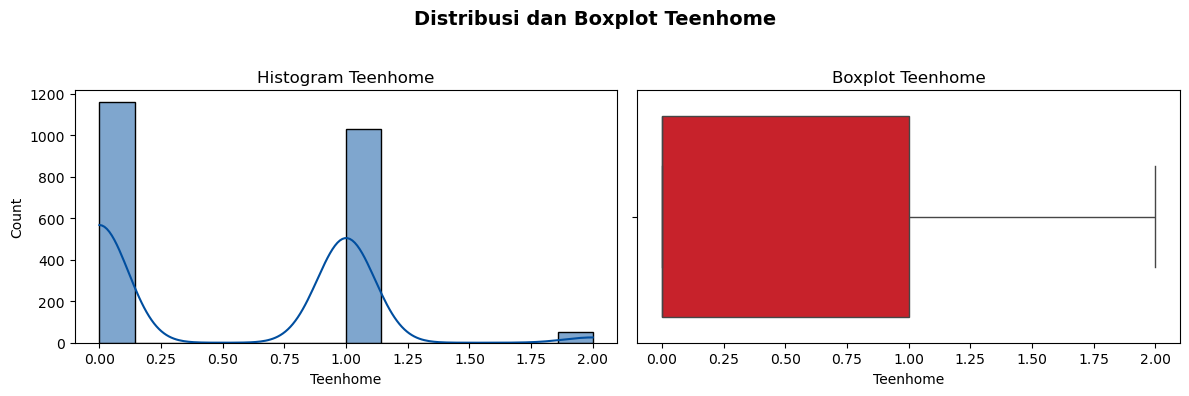

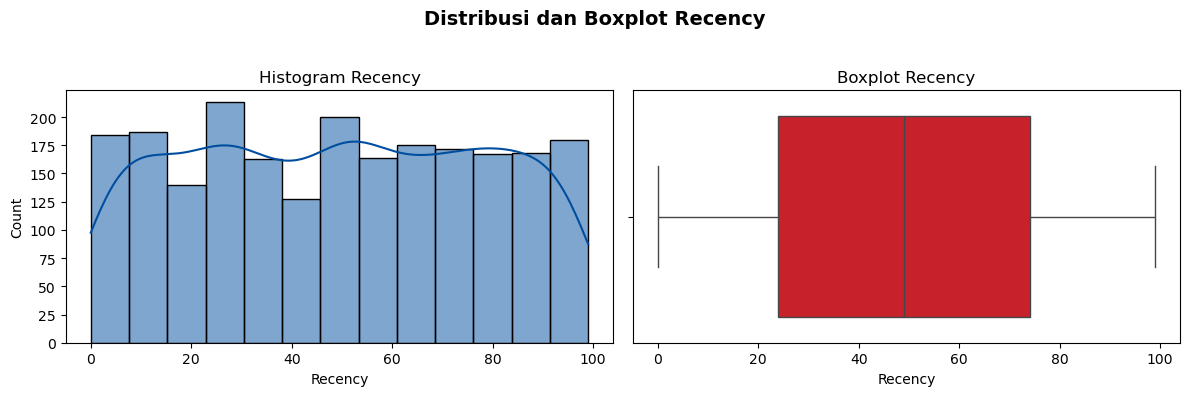

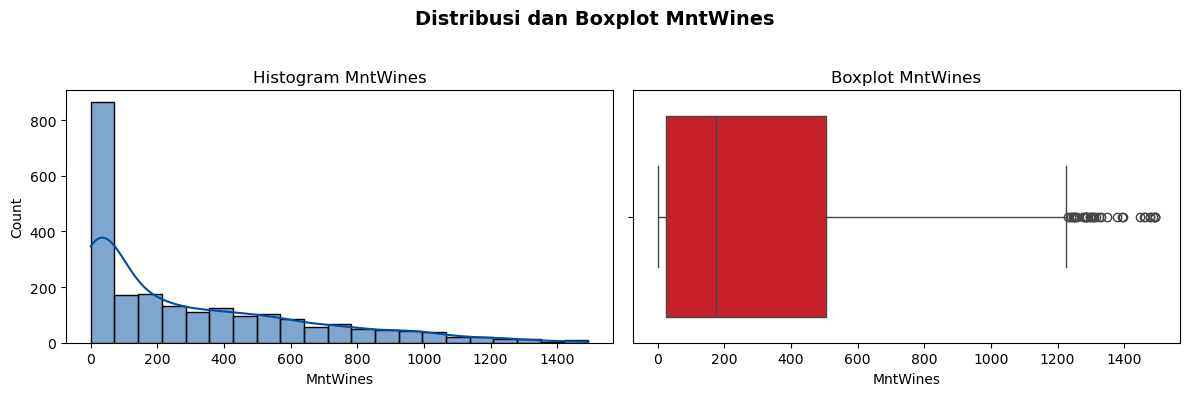

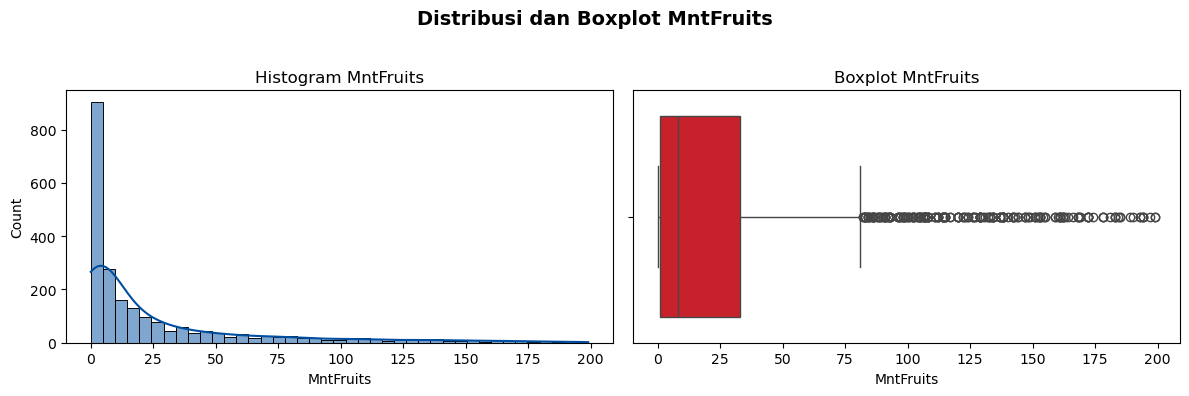

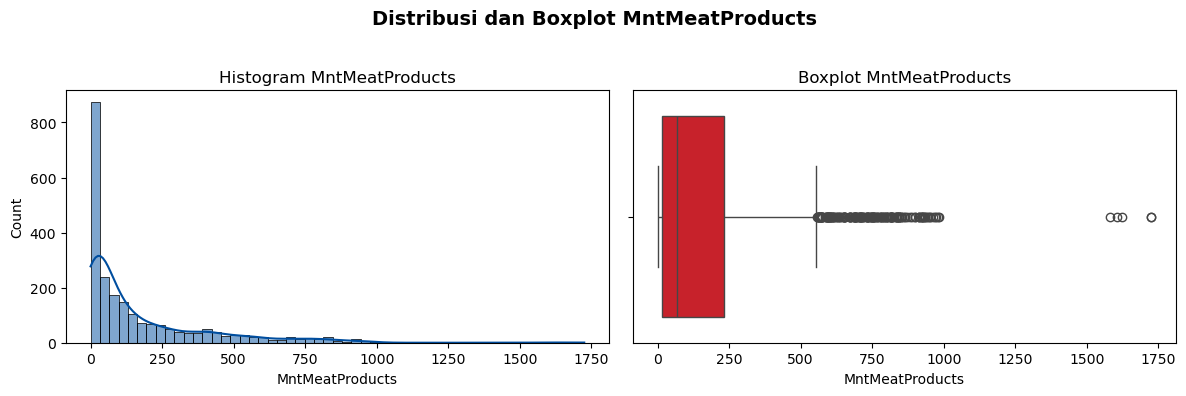

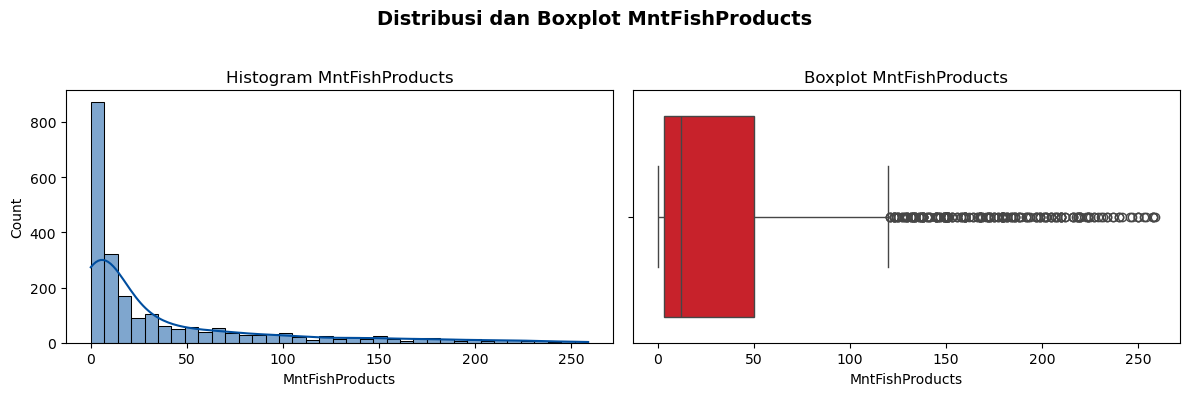

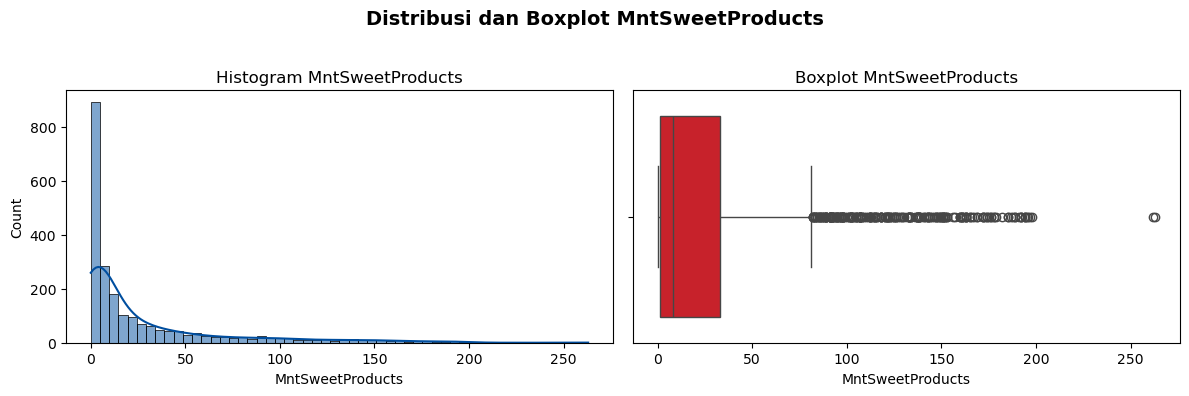

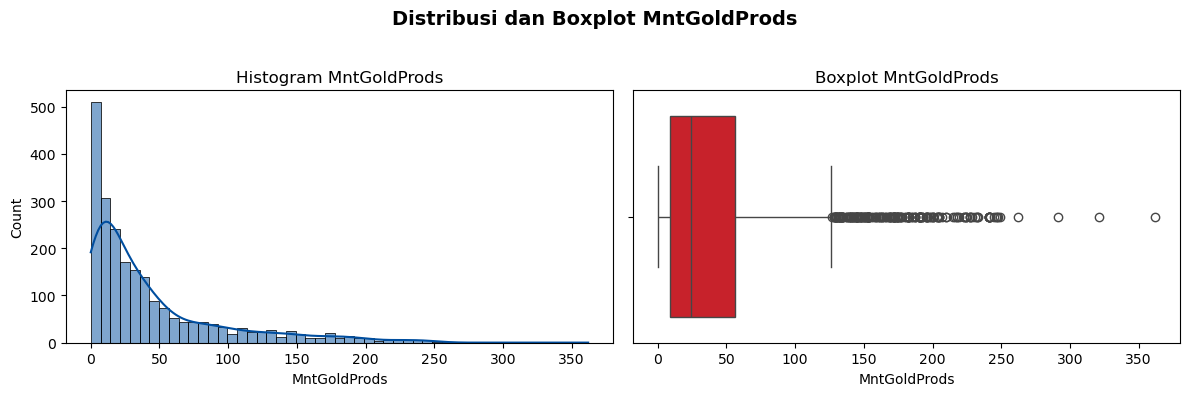

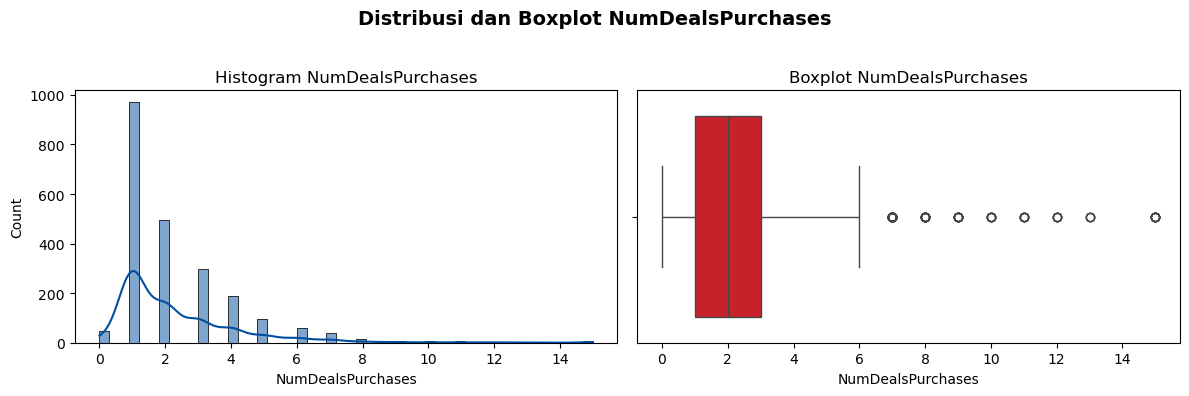

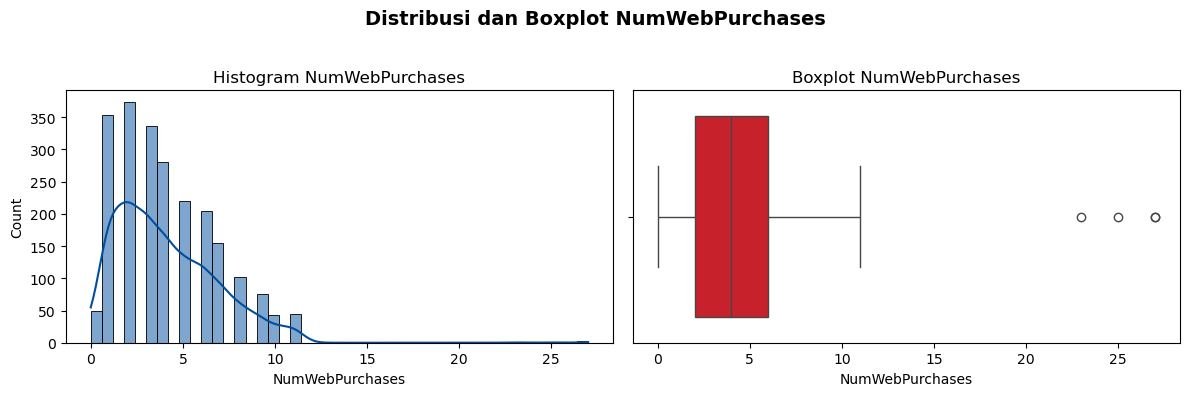

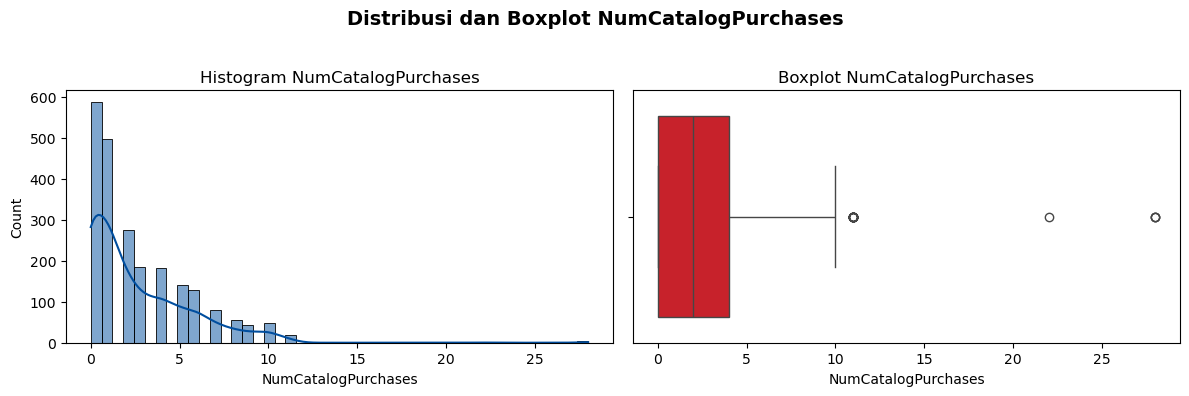

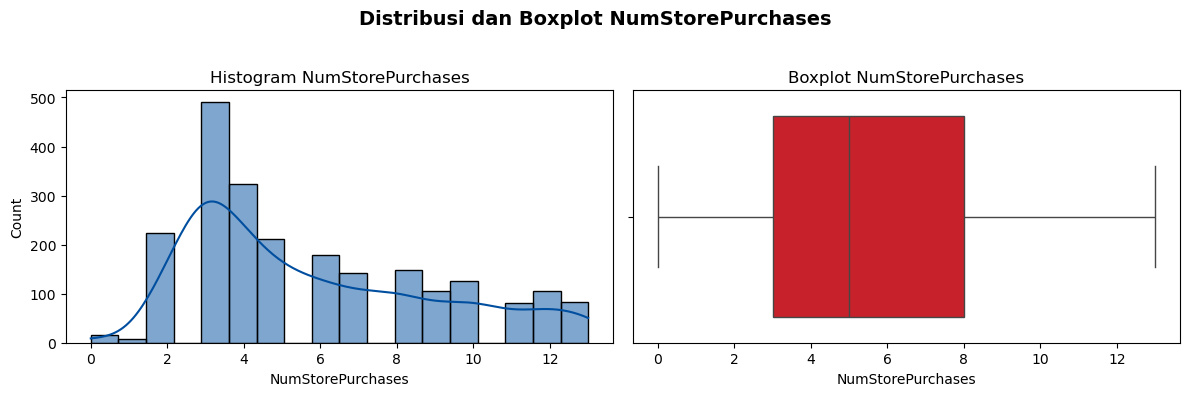

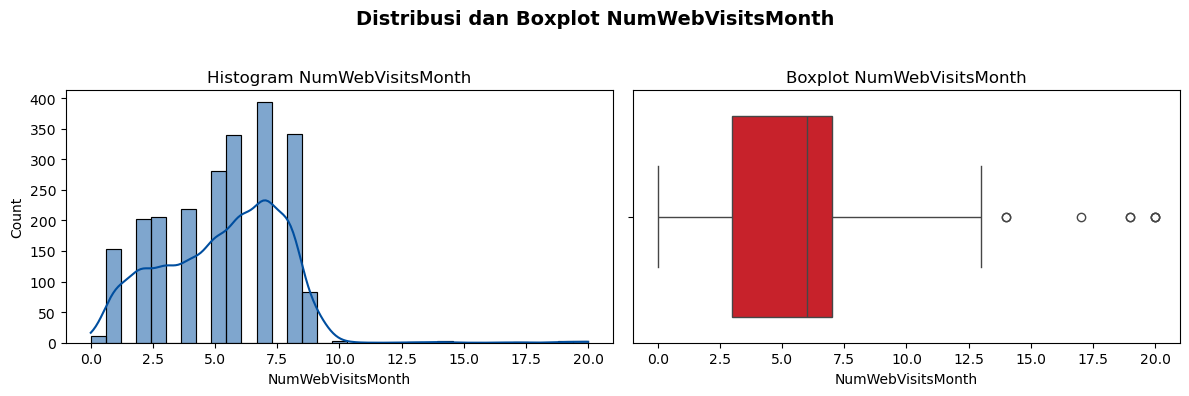

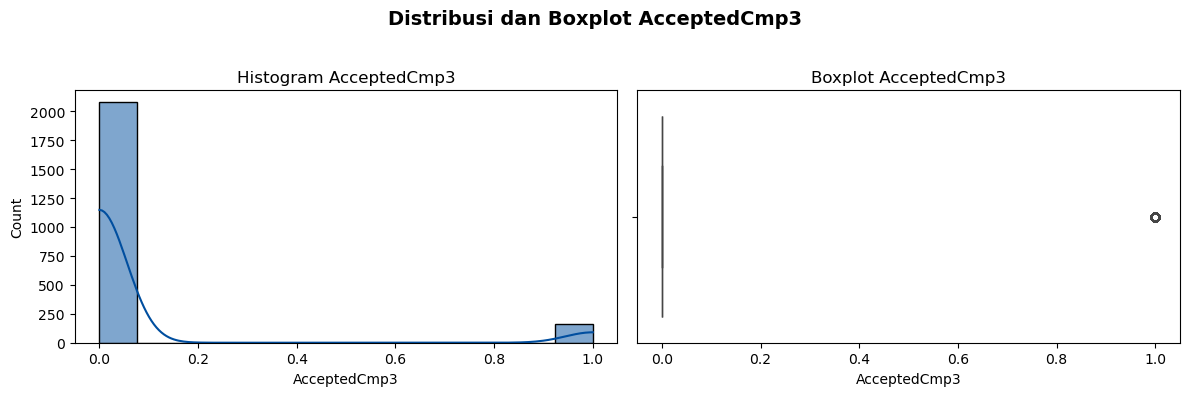

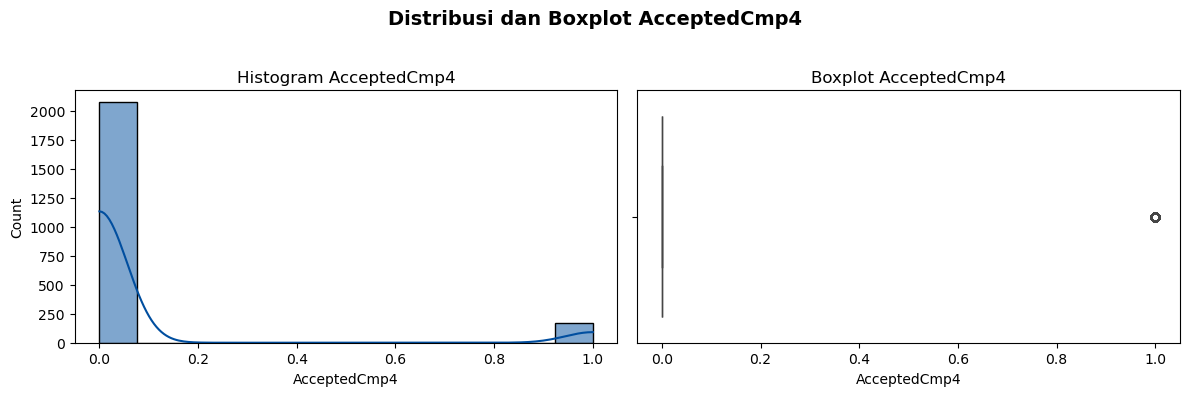

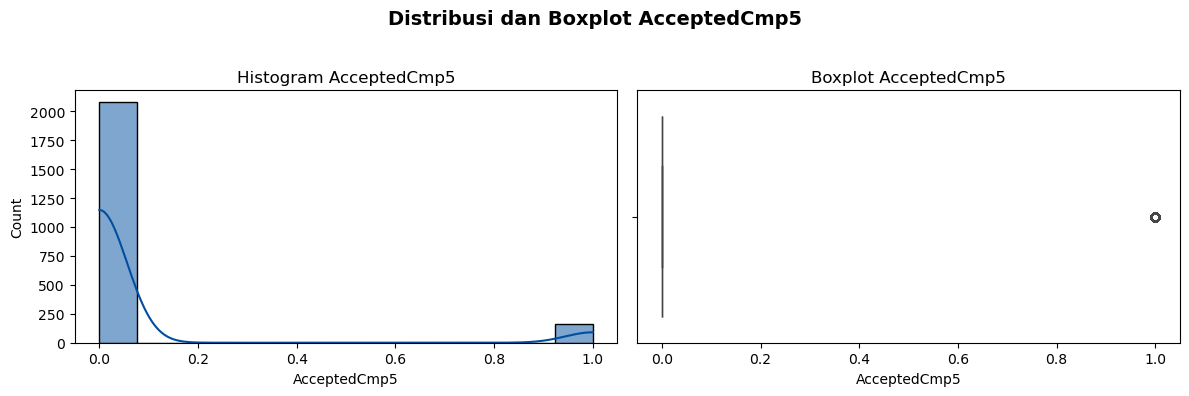

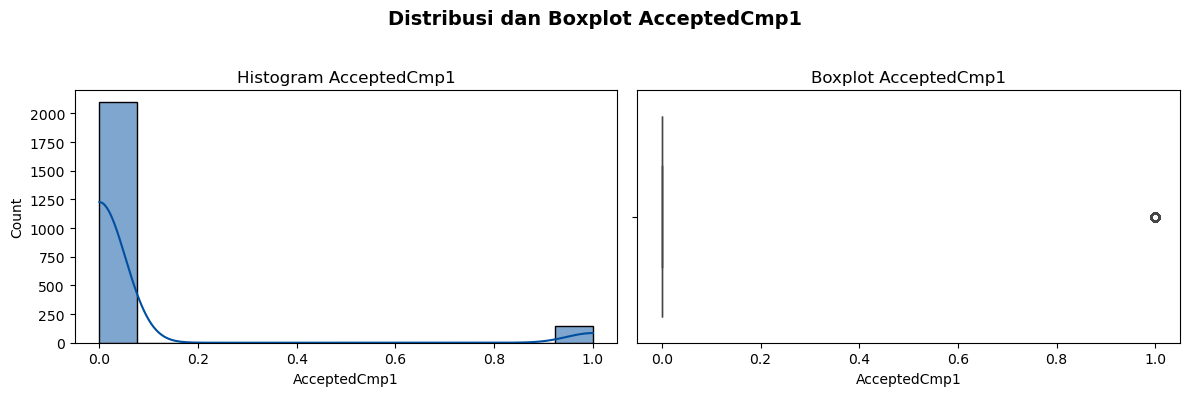

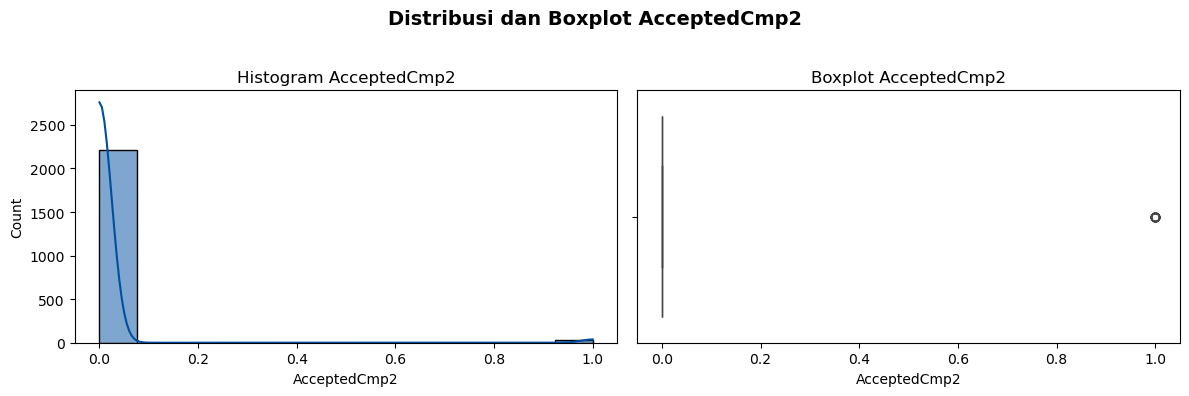

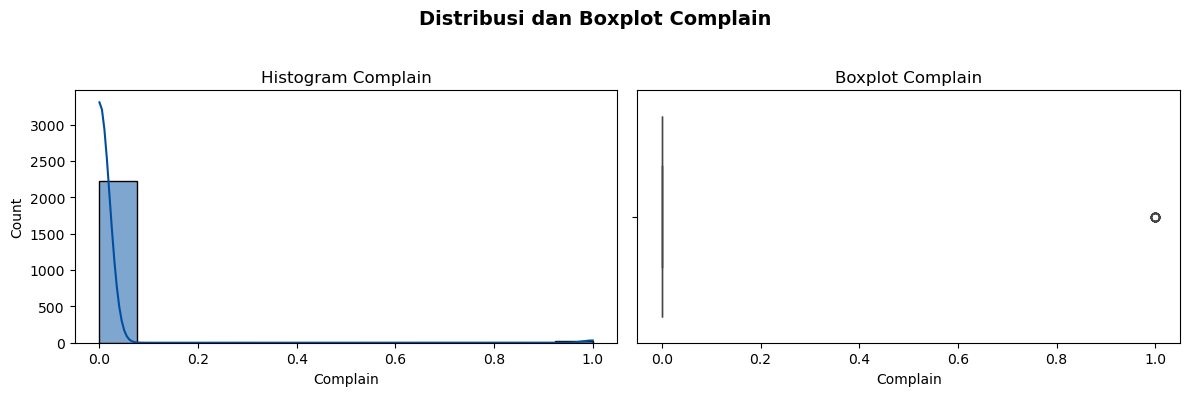

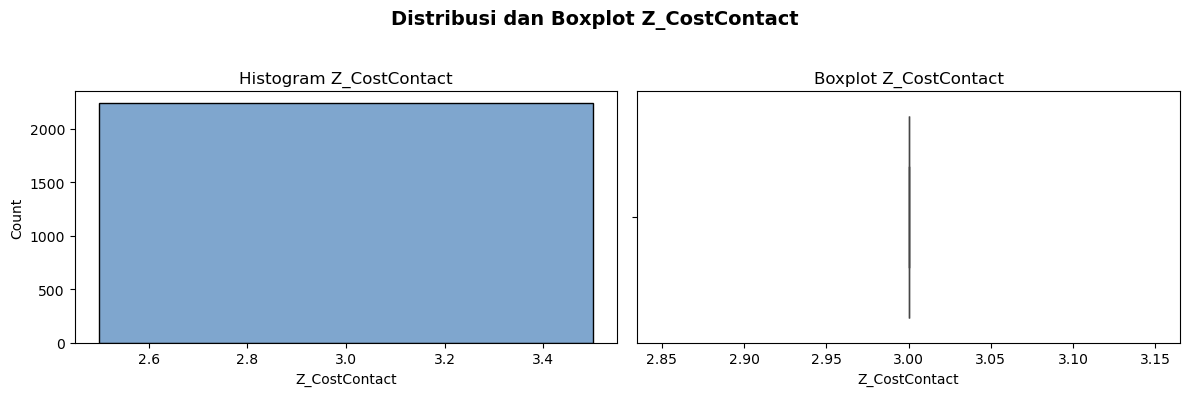

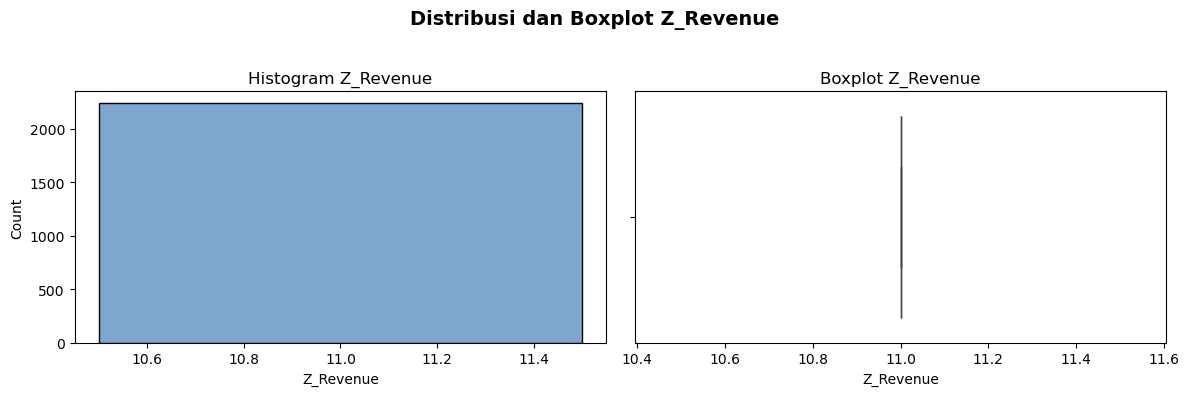

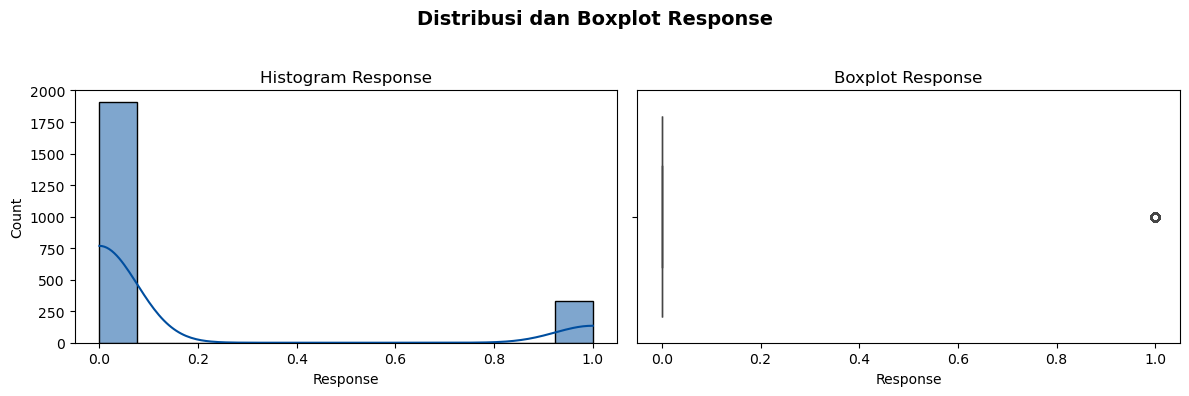

In [514]:
for i in df.select_dtypes('number'):
    plt.figure(figsize=(12,4))
    plt.suptitle(f"Distribusi dan Boxplot {i}", fontsize=14, fontweight='bold')

    plt.subplot(1,2,1)
    sns.histplot(data=df, x=i, kde=True, color="#004E9F")
    plt.title(f"Histogram {i}")

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=i, color="#E30613")
    plt.title(f"Boxplot {i}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Secara umum, kita bisa melihat bahwa:  
* Dataset **Supermarket Customers** memiliki **29 kolom** dan **2240 baris**.  
* Terdapat missing values di kolom **Income** sebanyak **24** baris.  Data kosong pada kolom tersebut diwakili dengan data NaN. Terdapat outlier sangat besar (666666) yang perlu ditangani.
* Kolom **Year_Birth** berisi tahun lahir, namun ada nilai tidak masuk akal (1893, 1899, 1900) yang menunjukkan usia di atas 120 tahun.  
* Kolom **Marital_Status** berisi status perkawinan, namun ada nilai aneh seperti "YOLO" dan "Absurd" yang perlu digabung ke kategori lain.  
* Kolom **Dt_Customer** masih berupa string dan perlu dikonversi ke datetime agar bisa diturunkan fitur tenure. 
* Kolom **Z_CostContact** dan **Z_Revenue** bernilai konstan sehingga tidak berguna dan sebaiknya dihapus.
* Kolom pengeluaran (**MntWines**, **MntFruits**, dll.) dan kolom perilaku belanja (**NumDealsPurchases**, **NumWebPurchases**, dll.) memiliki outlier. Outlier pada data ini sering kali justru menunjukkan pelanggan VIP atau big spender.
* Kolom Marketing Campaigns dan kolom Complain berisi nilai biner (0 dan 1) sehingga tidak termasuk outlier yang salah atau perlu dihapus.
* Menghitung total pengeluaran pelanggan, disimpan dalam kolom **Total_Spending**
* Menggabung semua respon kampanye menjadi kolom **OverallResponse** untuk menjadi target analisis pemasaran.

# Data Cleaning

## Handling Missing dan Outlier **Income**

Secara garis besar:  
* *Missing value* hanya ditemukan di kolom `Income`. Proporsinya tidak terlalu besar sehingga masih bisa ditangani dengan imputasi.  
* Terdapat outlier sangat besar (666666) yang perlu ditangani.
* Berdasarkan hasil analisis korelasi, `Income` memiliki hubungan cukup kuat dengan variabel  `NumCatalogPurchases` (0.59) dan `MntMeatProducts` (0.58). Hal ini menunjukkan bahwa pola belanja pelanggan dapat dijadikan acuan untuk mengisi nilai `Income` yang hilang.  

Cara  untuk menangani *missing value*:  
* Mengisi nilai yang hilang dengan **hierarki imputasi**.
  - Dalam kasus ini, kita memilih mengisi nilai `Income` yang kosong berdasarkan **median `Income`** dari pelanggan dengan jumlah `NumCatalogPurchases` dan `MntMeatProducts` yang sama. Namun, terdapat baris `Income` yang masih **NaN** dikarenakan terdapat kombinasi `NumCatalogPurchases` dan `MntMeatProducts` yang tidak punya data Income lain dalam grup yang sama. Baris `Income` yang kosong diisi dengan **median `Income`** dari pelanggan dengan jumlah `NumCatalogPurchases`yang sama.
  - Pemilihan metode ini didasarkan pada korelasi tinggi antara variabel.  

Cara untuk menangani *outlier*:
* Menggunakan winsorizing dengan batas persentil 1% dan 99%. Teknik ini tidak menghapus data, tetapi “membatasi” (cap) nilai ekstrim agar masuk ke rentang distribusi yang lebih wajar.

Alasan untuk setiap keputusan:
- Imputasi median per grup (NumCatalogPurchases, MntMeatProducts) → dipilih karena variabel ini punya korelasi cukup tinggi dengan Income. Jadi lebih masuk akal mengisi berdasarkan perilaku belanja serupa daripada rata-rata global.
- Fallback median per NumCatalogPurchases → dipakai kalau kombinasi tidak ada pasangan. Hal ini menjaga konsistensi tanpa banyak kehilangan data.
- Winsorizing 1%–99% → dipilih karena menjaga distribusi Income tetap representatif tanpa membuang terlalu banyak data (lebih baik daripada drop data ekstrem).



In [515]:
df_num = df.select_dtypes(include=['int64', 'float64'])
corr = df_num.corr()
corr_income = corr['Income'].sort_values(ascending=False)
print(corr_income)


Income                 1.000000
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
NumWebPurchases        0.387878
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Response               0.133047
AcceptedCmp2           0.087545
Teenhome               0.019133
ID                     0.013095
Recency               -0.003970
AcceptedCmp3          -0.016174
Complain              -0.027225
NumDealsPurchases     -0.083101
Year_Birth            -0.161791
Kidhome               -0.428669
NumWebVisitsMonth     -0.553088
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Income, dtype: float64


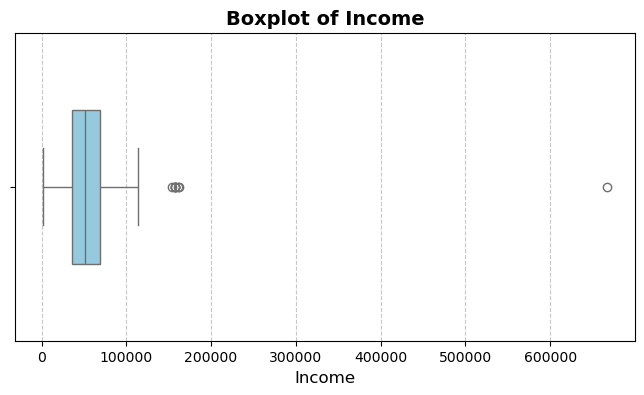

In [516]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Income"], color="skyblue", width=0.5)
plt.title("Boxplot of Income", fontsize=14, fontweight="bold")
plt.xlabel("Income", fontsize=12)
plt.ylabel("")  
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [517]:
df['Income'] = df.groupby(['NumCatalogPurchases','MntMeatProducts'])['Income']\
                 .transform(lambda x: x.fillna(x.median()))

df['Income'] = df.groupby(['NumCatalogPurchases'])['Income']\
                 .transform(lambda x: x.fillna(x.median()))


# Tangani outlier dengan winsorizing (cap nilai di 1% & 99%)
low, high = df["Income"].quantile([0.01, 0.99])
df["Income"] = df["Income"].clip(lower=low, upper=high)

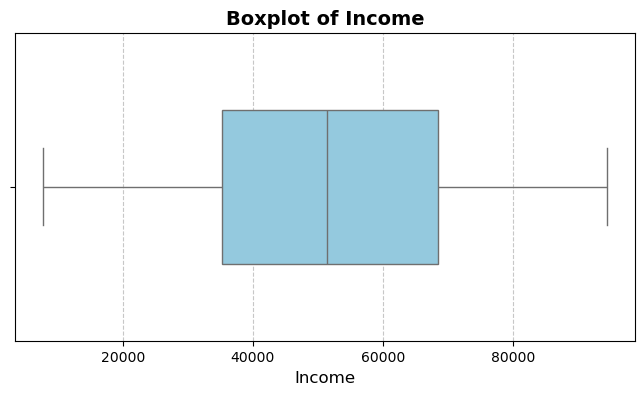

In [518]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Income"], color="skyblue", width=0.5)
plt.title("Boxplot of Income", fontsize=14, fontweight="bold")
plt.xlabel("Income", fontsize=12)
plt.ylabel("")  
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [519]:
# persentase missing value di tiap kolom
df_null=pd.DataFrame(round(100*df.isna().sum()/len(df),2)).rename(columns={0:'Null Percentage'}).astype(str)+' %'
df_null['Null Count']=df.isna().sum()
df_null

,Null Percentage,Null Count
ID,0.0 %,0
Year_Birth,0.0 %,0
Education,0.0 %,0
Marital_Status,0.0 %,0
Income,0.0 %,0
Kidhome,0.0 %,0
Teenhome,0.0 %,0
Dt_Customer,0.0 %,0
Recency,0.0 %,0
MntWines,0.0 %,0


## Mengatasi Outlier **Year_Birth**
* Variabel Year_Birth dikonversi menjadi Age dengan rumus Age = 2025 - Year_Birth.
* Hasil eksplorasi menunjukkan bahwa terdapat nilai umur yang tidak wajar menunjukkan usia 132 tahun
* Boxplot memperlihatkan distribusi umur dengan adanya titik ekstrim yang tidak realistis.   

cara untuk menangani outlier:
* Menetapkan batasan wajar untuk umur pelanggan.  
    - Nilai Age < 18 dianggap tidak valid karena data survei/pelanggan umumnya hanya mencakup orang dewasa. 
    - Nilai Age > 100 juga dianggap anomali karena sangat jarang ada pelanggan dengan umur di atas 100 tahun. 
* Baris data dengan umur di luar rentang tersebut dihapus.

Alasan untuk setiap keputusan:
- Konversi ke Age → lebih mudah dipahami secara bisnis (umur pelanggan).
- Range 18–100 → usia <18 jarang jadi target marketing, >100 hampir mustahil, sehingga baris di luar rentang dianggap anomali dan dihapus

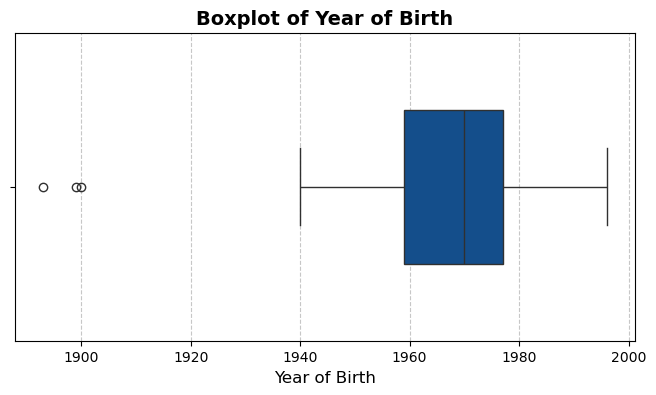

In [520]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Year_Birth"], color="#004E9F", width=0.5)
plt.title("Boxplot of Year of Birth", fontsize=14, fontweight="bold")
plt.xlabel("Year of Birth", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [521]:
ref_year = 2024 # tahun lalu
df["Age"] = ref_year - df["Year_Birth"]


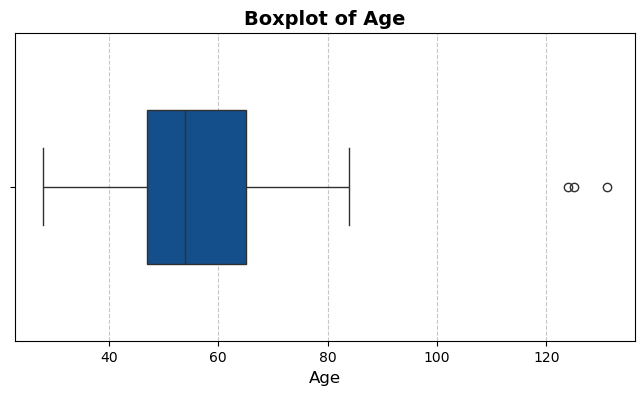

In [522]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Age"], color="#004E9F", width=0.5)
plt.title("Boxplot of Age", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [523]:
# Buang nilai aneh (Age < 18 atau Age > 100)
df = df[(df["Age"] >= 18) & (df["Age"] <= 100)]

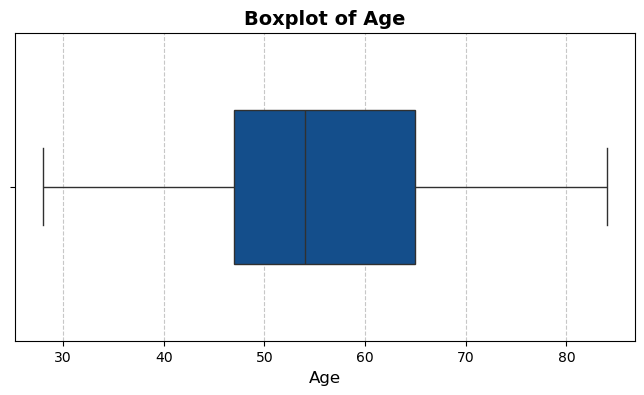

In [524]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Age"], color="#004E9F", width=0.5)
plt.title("Boxplot of Age", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


## Mengatasi Anomali Marital_Status
* Variabel `Marital_Status` memiliki beberapa kategori unik, termasuk label yang tidak konsisten atau jarang muncul.
* Beberapa kategori sebenarnya memiliki makna serupa, sehingga lebih baik digabungkan agar analisis lebih sederhana dan hasil model lebih stabil.

Cara untuk menangani:

* Penggabungan kategori:
    * Together dianggap sama dengan Married, sehingga digabung menjadi satu kategori.
    * Alone diganti menjadi Single.
* Pembersihan kategori tidak valid:
    * Hanya kategori utama yang dipertahankan, yaitu Married, Single, Divorced, dan Widow.
    * Kategori di luar itu diubah menjadi Other.

Alasan untuk setiap keputusan:
- Merging kategori serupa (Together → Married, Alone → Single) → supaya distribusi lebih stabil dan mudah diinterpretasi.
- Kategori minor → Other → mengurangi sparsity, menjaga model/statistik tetap robust.

In [525]:
pd.DataFrame(df["Marital_Status"].unique())

,0
0,Single
1,Together
2,Married
3,Divorced
4,Widow
5,Alone
6,Absurd
7,YOLO


In [526]:
df["Marital_Status"] = df["Marital_Status"].replace({
    "Together": "Married",
    "Alone": "Single"
})

valid_status = ["Married", "Single", "Divorced", "Widow"]
df["Marital_Status"] = np.where(df["Marital_Status"].isin(valid_status),
                                df["Marital_Status"], "Other")


In [527]:
pd.DataFrame(df["Marital_Status"].unique())

,0
0,Single
1,Married
2,Divorced
3,Widow
4,Other


## Konversi Dt_Customer ke datetime
* Variabel Dt_Customer berisi tanggal pertama kali pelanggan mulai berinteraksi dengan perusahaan (tanggal menjadi pelanggan).
* Untuk mengukur lama waktu pelanggan aktif/loyal terhadap perusahaan, kita perlu menghitung tenure (masa bergabung).

Cara perhitungan:
* Kolom Dt_Customer dikonversi ke format datetime dengan format "%d-%m-%Y".
* Ditentukan reference date yaitu 2024-12-31, sehingga perhitungan umur pelanggan konsisten sampai tanggal tersebut.

Variabel baru dibuat:
* Tenure_days = selisih hari antara ref_date dan Dt_Customer.
Hasil akhir:
* Setiap pelanggan kini memiliki informasi seberapa lama mereka sudah bergabung dengan perusahaan, baik dalam satuan hari maupun tahun.
* Variabel ini penting untuk analisis customer lifecycle, misalnya membandingkan perilaku pelanggan baru vs pelanggan lama.

Alasan untuk setiap keputusan:
- Konversi ke datetime & hitung tenure → menambah insight seberapa lama pelanggan bertahan, relevan untuk analisis loyalitas dan segmentasi.

In [528]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [529]:
ref_date = pd.to_datetime("2024-12-31")
df["Tenure_days"] = (ref_date - df["Dt_Customer"]).dt.days
df[["Dt_Customer", "Tenure_days"]].head()

,Dt_Customer,Tenure_days
0,2012-09-04,4501
1,2014-03-08,3951
2,2013-08-21,4150
3,2014-02-10,3977
4,2014-01-19,3999


## Z_CostContact  dan Z_Revenue
kolom `Z_CostContact` dan `Z_Revenue` berisikan konstanta, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

Alasan untuk setiap keputusan:
Kolom-kolom tidak punya variasi, tidak berkontribusi pada analisis.

In [530]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

####

## Membuat kolom `Total_Spending`

Kode ini digunakan untuk membuat kolom baru bernama Total_Spending yang merepresentasikan total belanja pelanggan. Dataset awal hanya menyimpan pengeluaran pelanggan secara terpisah berdasarkan kategori produk, seperti wine, daging, buah, ikan, permen, dan emas. Jika ingin menganalisis perilaku belanja pelanggan secara keseluruhan kita membutuhkan ukuran agregat yang lebih ringkas.

Alasan untuk setiap keputusan:  
supaya bisa analisis total perilaku konsumsi pelanggan dengan metrik tunggal yang lebih ringkas.

In [531]:
produk_cols = ["MntWines","MntMeatProducts","MntFruits","MntFishProducts","MntSweetProducts","MntGoldProds"]
df["Total_Spending"] = df[produk_cols].sum(axis=1)


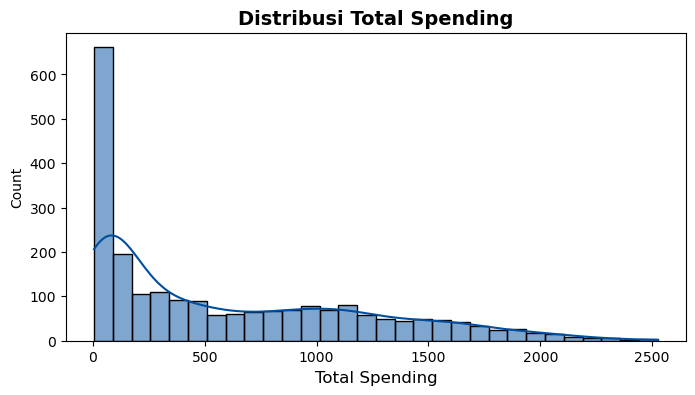

In [532]:
plt.figure(figsize=(8,4))
sns.histplot(df["Total_Spending"], bins=30, kde=True, color="#004E9F")
plt.title("Distribusi Total Spending", fontsize=14, fontweight="bold")
plt.xlabel("Total Spending", fontsize=12)
plt.ylabel("Count")
plt.show()


## Menggabungkan Respon Kampanye

Langkah ini dilakukan untuk **menyatukan informasi respons kampanye yang tersebar di banyak kolom menjadi satu indikator ringkas**. Dengan adanya kolom `OverallResponse`, kita bisa lebih mudah membedakan pelanggan yang pernah merespons kampanye (1) dengan yang tidak pernah merespons (0). Penyederhanaan ini penting agar analisis lebih fokus, praktis, dan tidak perlu lagi membandingkan setiap kampanye satu per satu.

Alasan untuk setiap keputusan:  
menyederhanakan banyak variabel biner jadi satu indikator yang jelas (pernah merespon/tidak). Lebih mudah untuk analisis segmentasi atau uji statistik.


In [533]:
df["OverallResponse"] = df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].max(axis=1)

df = df.drop(columns=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]).reset_index(drop=True)


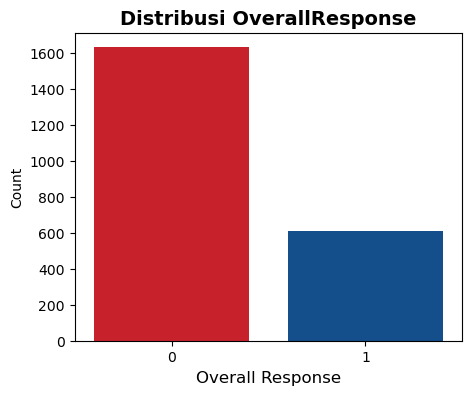

In [534]:
plt.figure(figsize=(5,4))
sns.countplot(x="OverallResponse", data=df, palette=["#E30613", "#004E9F"])
plt.title("Distribusi OverallResponse", fontsize=14, fontweight="bold")
plt.xlabel("Overall Response", fontsize=12)
plt.ylabel("Count")
plt.show()


## Menyimpan data yang telah di preprocessing

In [535]:
df.to_csv('Processed_data.csv',index=False)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [536]:
listItem = []
for col in df.columns:
    unique_sample = list(df[col].unique()[:2])  # ambil 2 pertama
    
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        unique_sample
    ])

dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
    data=listItem
)

print(df.shape)
dfDesc


(2237, 25)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2237,"[5524, 2174]"
1,Year_Birth,int64,0,56,"[1957, 1954]"
2,Education,object,0,5,"[Graduation, PhD]"
3,Marital_Status,object,0,5,"[Single, Married]"
4,Income,float64,0,1942,"[58138.0, 46344.0]"
5,Kidhome,int64,0,3,"[0, 1]"
6,Teenhome,int64,0,3,"[0, 1]"
7,Dt_Customer,datetime64[ns],0,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00]"
8,Recency,int64,0,100,"[58, 38]"
9,MntWines,int64,0,775,"[635, 11]"


Sebelum dibersihkan, data pelanggan supermarket memiliki 2.240 baris dan 29 kolom. Setelah melalui proses preprocessing, jumlah baris berkurang menjadi 2.237.

# Data Analysis

## 1. Bagaimana cara mengurangi pengeluaran pemasaran dengan melakukan segmentasi pelanggan?


Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana cara mengurangi pengeluaran pemasaran dengan melakukan segmentasi pelanggan?**.  

Analisis akan dilakukan dengan membandingkan pelanggan yang merespons kampanye pemasaran (target = 1) dan yang tidak merespons (target = 0) berdasarkan fitur-fitur yang tersedia. Karena dari seluruh pelanggan dalam dataset, hanya sebagian kecil yang memberikan respons positif terhadap kampanye, kita perlu berhati-hati dalam melakukan perbandingan. Oleh karena itu, analisis sebaiknya dilakukan dengan melihat proporsi atau rasio tiap segmen, terutama pada data dengan tipe kategorikal seperti status pernikahan atau kondisi rumah tangga, agar hasil lebih representatif.


### Berdasarkan pemasukan dan pengeluaran

Pertama, mari kita lihat bagaimana pengaruh pendapatan pelanggan terhadap pola belanja mereka. Kita akan menganalisis kolom `Income` dan `Total_Spending` untuk menjawab beberapa pertanyaan:

1. Kelompok pendapatan mana yang memiliki jumlah pelanggan terbanyak?
2. Kelompok pendapatan mana yang memiliki rata-rata pengeluaran paling tinggi?
3. Apakah ada perbedaan yang signifikan antara rata-rata pengeluaran pelanggan berpendapatan tinggi dan rendah?

Berdasarkan `Income`

In [537]:
alpha = 0.05

income_yes = df.loc[df["OverallResponse"] == 1, "Income"].dropna()
income_no  = df.loc[df["OverallResponse"] == 0, "Income"].dropna()

# Uji normalitas per grup
stat_yes, p_yes = normaltest(income_yes)
stat_no,  p_no  = normaltest(income_no)

print(f"Normality test Income (Yes): stat={stat_yes:.4f}, p-value={p_yes:.6e}")
print(f"Normality test Income (No):  stat={stat_no:.4f}, p-value={p_no:.6e}")

# Uji beda median (nonparametrik) karena umumnya tidak normal
stat, p_val = mannwhitneyu(income_yes, income_no, alternative="two-sided")
effect = income_yes.median() - income_no.median()

print(f"\nMann-Whitney U: stat={stat:.4f}, p-value={p_val:.6e}")
print(f"Perbedaan median Yes - No = {effect:.2f}")
print("Keputusan:", "Tolak H0 (Ada hubungan Income dan OverallResponse)" 
      if p_val < alpha else "Terima H0 (Tidak ada hubungan Income dan OverallResponse)")


Normality test Income (Yes): stat=61.6609, p-value=4.078595e-14
Normality test Income (No):  stat=159.8492, p-value=1.946220e-35

Mann-Whitney U: stat=679655.5000, p-value=5.976740e-42
Perbedaan median Yes - No = 17701.00
Keputusan: Tolak H0 (Ada hubungan Income dan OverallResponse)


Hasil uji statistik menunjukkan distribusi pendapatan pada kedua kelompok tidak normal, sehingga digunakan Mann-Whitney U Test. Uji ini menghasilkan p-value yang sangat kecil (<0,05), menandakan adanya perbedaan signifikan antara pendapatan pelanggan yang merespons kampanye dan yang tidak.

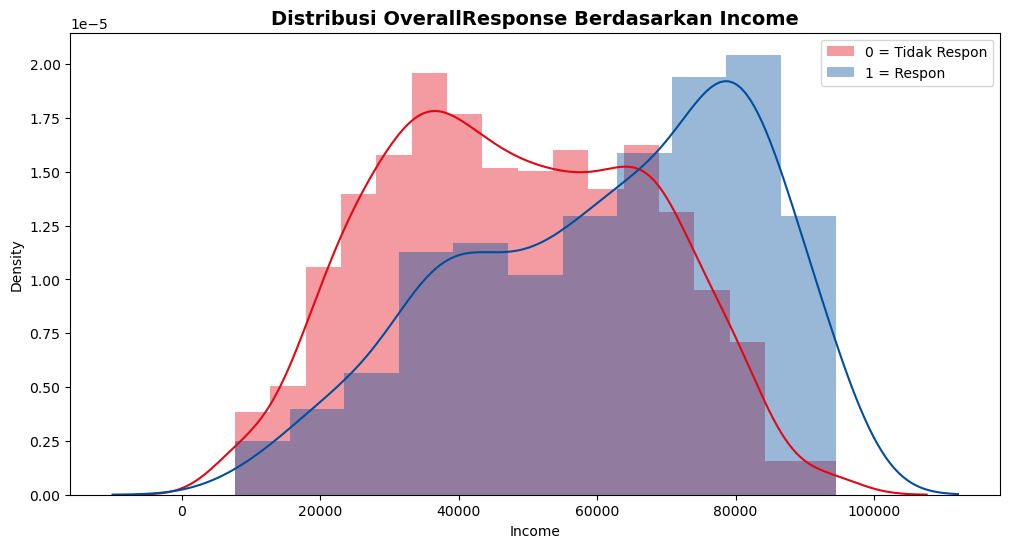

In [538]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['OverallResponse']==0]['Income'], label="0 = Tidak Respon", color="#E30613")
sns.distplot(df[df['OverallResponse']==1]['Income'], label="1 = Respon", color="#004E9F")
plt.title('Distribusi OverallResponse Berdasarkan Income', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()


Visualisasi mendukung hasil ini, di mana pelanggan yang merespons cenderung memiliki pendapatan menengah hingga tinggi, sedangkan pelanggan berpendapatan rendah lebih jarang merespons.

berdasarkan `Total_Spending`

In [539]:
alpha = 0.05

spending_yes = df.loc[df["OverallResponse"] == 1, "Total_Spending"].dropna()
spending_no  = df.loc[df["OverallResponse"] == 0, "Total_Spending"].dropna()

stat_yes, p_yes = normaltest(spending_yes)
stat_no,  p_no  = normaltest(spending_no)

print(f"Normality test Total_Spending (Yes): stat={stat_yes:.4f}, p-value={p_yes:.6e}")
print(f"Normality test Total_Spending (No):  stat={stat_no:.4f}, p-value={p_no:.6e}")

stat, p_val = mannwhitneyu(spending_yes, spending_no, alternative="two-sided")
effect = spending_yes.median() - spending_no.median()

print(f"\nMann-Whitney U: stat={stat:.4f}, p-value={p_val:.6e}")
print(f"Perbedaan median Yes - No = {effect:.2f}")
print("Keputusan:", "Tolak H0 (Ada hubungan Total_Spending dan OverallResponse)" if p_val < alpha else "Terima H0 (Tidak ada hubungan Total_Spending dan OverallResponse)")


Normality test Total_Spending (Yes): stat=389.1039, p-value=3.214806e-85
Normality test Total_Spending (No):  stat=221.0431, p-value=1.002521e-48

Mann-Whitney U: stat=731853.5000, p-value=6.766453e-68
Perbedaan median Yes - No = 796.00
Keputusan: Tolak H0 (Ada hubungan Total_Spending dan OverallResponse)


Hasil uji normalitas menunjukkan distribusi Total_Spending pada kedua kelompok (merespons dan tidak merespons) tidak normal, sehingga digunakan Mann-Whitney U Test. Uji ini menghasilkan p-value sangat kecil (≈ 6.76e-68 < 0.05), yang berarti terdapat perbedaan signifikan antara total pengeluaran pelanggan yang merespons kampanye dan yang tidak.

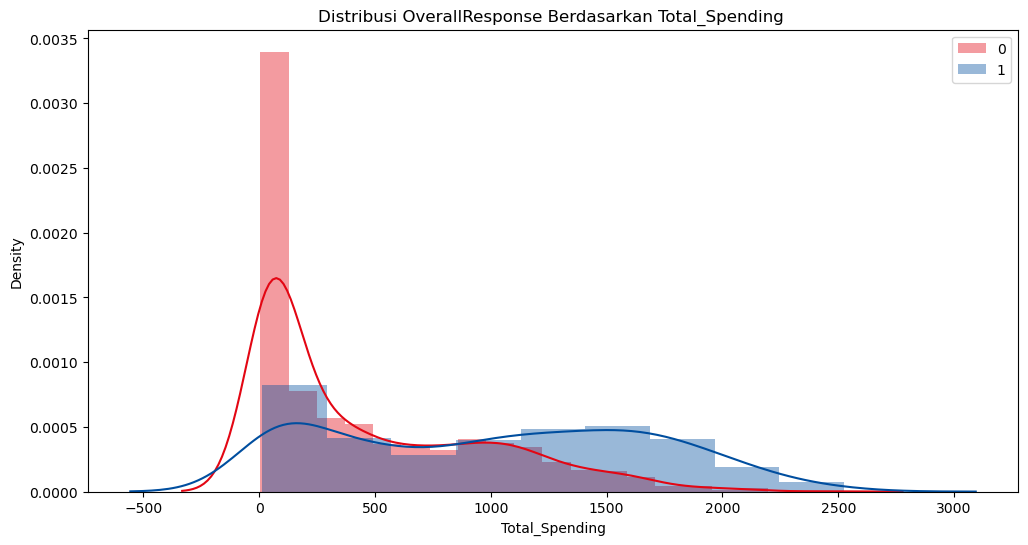

In [540]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['OverallResponse']==0]['Total_Spending'],label=0, color="#E30613")
sns.distplot(df[df['OverallResponse']==1]['Total_Spending'],label=1, color="#004E9F")
plt.title('Distribusi OverallResponse Berdasarkan Total_Spending ')
plt.legend()
plt.show()

Visualisasi distribusi menunjukkan bahwa pelanggan yang merespons kampanye (label 1, kurva oranye) cenderung memiliki total pengeluaran yang lebih tinggi dibandingkan dengan pelanggan yang tidak merespons (label 0, kurva biru). Distribusi respon positif lebih dominan pada rentang pengeluaran menengah hingga tinggi, sedangkan respon negatif terkonsentrasi pada pengeluaran yang rendah.

Analisis menunjukkan adanya perbedaan signifikan pada pendapatan dan total spending antara pelanggan yang merespons kampanye dan yang tidak. Pelanggan yang merespons cenderung memiliki pendapatan dan pengeluaran lebih tinggi, sementara pelanggan berpendapatan rendah jarang merespons. Hal ini mengindikasikan bahwa kampanye lebih efektif jika difokuskan pada segmen menengah–tinggi, meskipun tetap perlu hati-hati agar tidak bias hanya pada kelompok dominan dalam data.

## Berdasarkan kondisi rumah tangga: 

Berikutnya, mari kita lihat fitur-fitur yang berkaitan dengan keadaan rumah tangga. Fitur yang terkait adalah `Marital_Status`, `Kidhome` dan `Teenhome`.  

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:

1. Status pernikahan mana yang memiliki pelanggan paling responsif terhadap kampanye pemasaran?
2. Apakah jumlah anak kecil (Kidhome) berpengaruh terhadap respons pelanggan pada kampanye?
3. Apakah jumlah remaja dalam rumah tangga (Teenhome) memengaruhi tingkat respons pelanggan?

berdasarkan `Marital_Status`

In [541]:
alpha = 0.05

chi2, p_val, dof, expected = chi2_contingency(contingency_table)

min_expected = expected.min()
print(f"Expected frequency minimum: {min_expected:.4f}")

print(f"\nChi-square: stat={chi2:.4f}, p-value={p_val:.6e}, dof={dof}")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

print("Keputusan:", "Tolak H0 (Ada hubungan Marital_Status dan OverallResponse)" if p_val < alpha else "Terima H0 (Tidak ada hubungan Marital_Status dan OverallResponse)")


Expected frequency minimum: 14.6768

Chi-square: stat=14.3057, p-value=6.380786e-03, dof=4
OverallResponse           0           1
Education                              
2n Cycle         146.369692   54.630308
Basic             39.323201   14.676799
Graduation       820.689763  306.310237
Master           269.436746  100.563254
PhD              353.180599  131.819401
Keputusan: Tolak H0 (Ada hubungan Marital_Status dan OverallResponse)


Hasil uji Chi-Square menunjukkan nilai p-value = 0.025 (< 0.05), yang berarti terdapat hubungan signifikan antara status pernikahan dengan tingkat respons terhadap kampanye. Artinya, status pernikahan pelanggan berpengaruh terhadap kecenderungan mereka untuk merespons atau tidak merespons kampanye pemasaran.

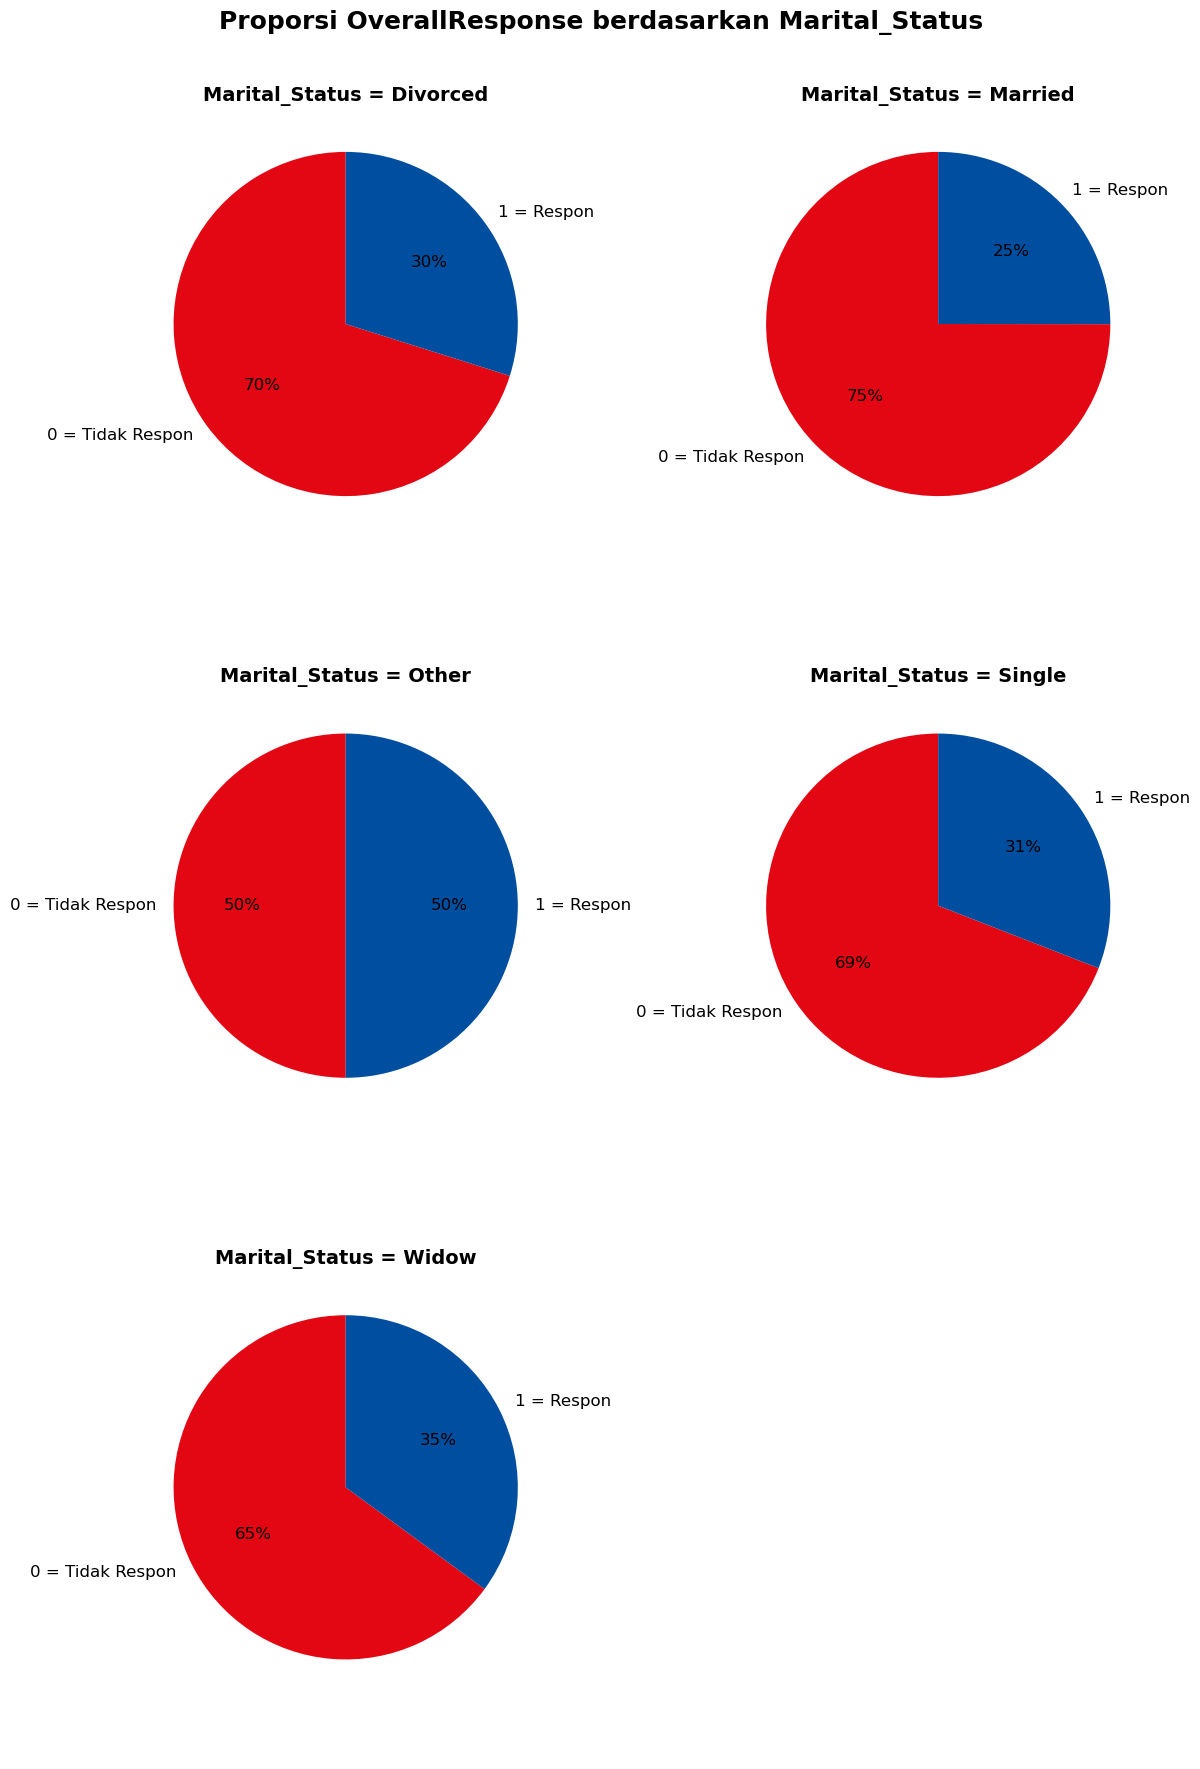

In [542]:
ct = pd.crosstab(df['Marital_Status'], df['OverallResponse'], normalize='index')

n = len(ct.index)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()

for ax, (idx, row) in zip(axes, ct.iterrows()):
    row.plot(kind='pie',
             autopct=lambda p: f'{p:.0f}%',
             startangle=90,
             colors=['#E30613','#004E9F'],
             labels=['0 = Tidak Respon','1 = Respon'],
             ax=ax,
             textprops={'fontsize': 12})
    ax.set_ylabel('')
    ax.set_title(f'Marital_Status = {idx}', fontsize=14, fontweight='bold')

for j in range(len(ct), len(axes)):
    axes[j].axis('off')

plt.suptitle("Proporsi OverallResponse berdasarkan Marital_Status", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


Hasil analisis menunjukkan bahwa secara keseluruhan pelanggan dengan status pernikahan apa pun lebih banyak yang tidak merespons kampanye dibandingkan yang merespons. Proporsi respon (oranye) terlihat jauh lebih sedikit daripada tidak respon (biru) pada seluruh kategori. Namun, pelanggan dengan status Widow dan Other memiliki kecenderungan merespons yang relatif lebih tinggi dibandingkan kategori lain.

berdasarkan `Kidhome`

In [543]:
alpha = 0.05

chi2, p_val, dof, expected = chi2_contingency(contingency_table)

min_expected = expected.min()
print(f"Expected frequency minimum: {min_expected:.4f}")

print(f"\nChi-square: stat={chi2:.4f}, p-value={p_val:.6e}, dof={dof}")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

print("Keputusan:", "Tolak H0 (Ada hubungan Kidhome dan OverallResponse)" if p_val < alpha else "Terima H0 (Tidak ada hubungan Kidhome dan OverallResponse)")


Expected frequency minimum: 14.6768

Chi-square: stat=14.3057, p-value=6.380786e-03, dof=4
OverallResponse           0           1
Education                              
2n Cycle         146.369692   54.630308
Basic             39.323201   14.676799
Graduation       820.689763  306.310237
Master           269.436746  100.563254
PhD              353.180599  131.819401
Keputusan: Tolak H0 (Ada hubungan Kidhome dan OverallResponse)


Hasil uji Chi-Square menghasilkan p-value yang sangat kecil (≈ 1.55e-14 < 0.05), artinya terdapat hubungan signifikan antara jumlah anak kecil di rumah tangga (Kidhome) dengan tingkat respons pelanggan terhadap kampannye.

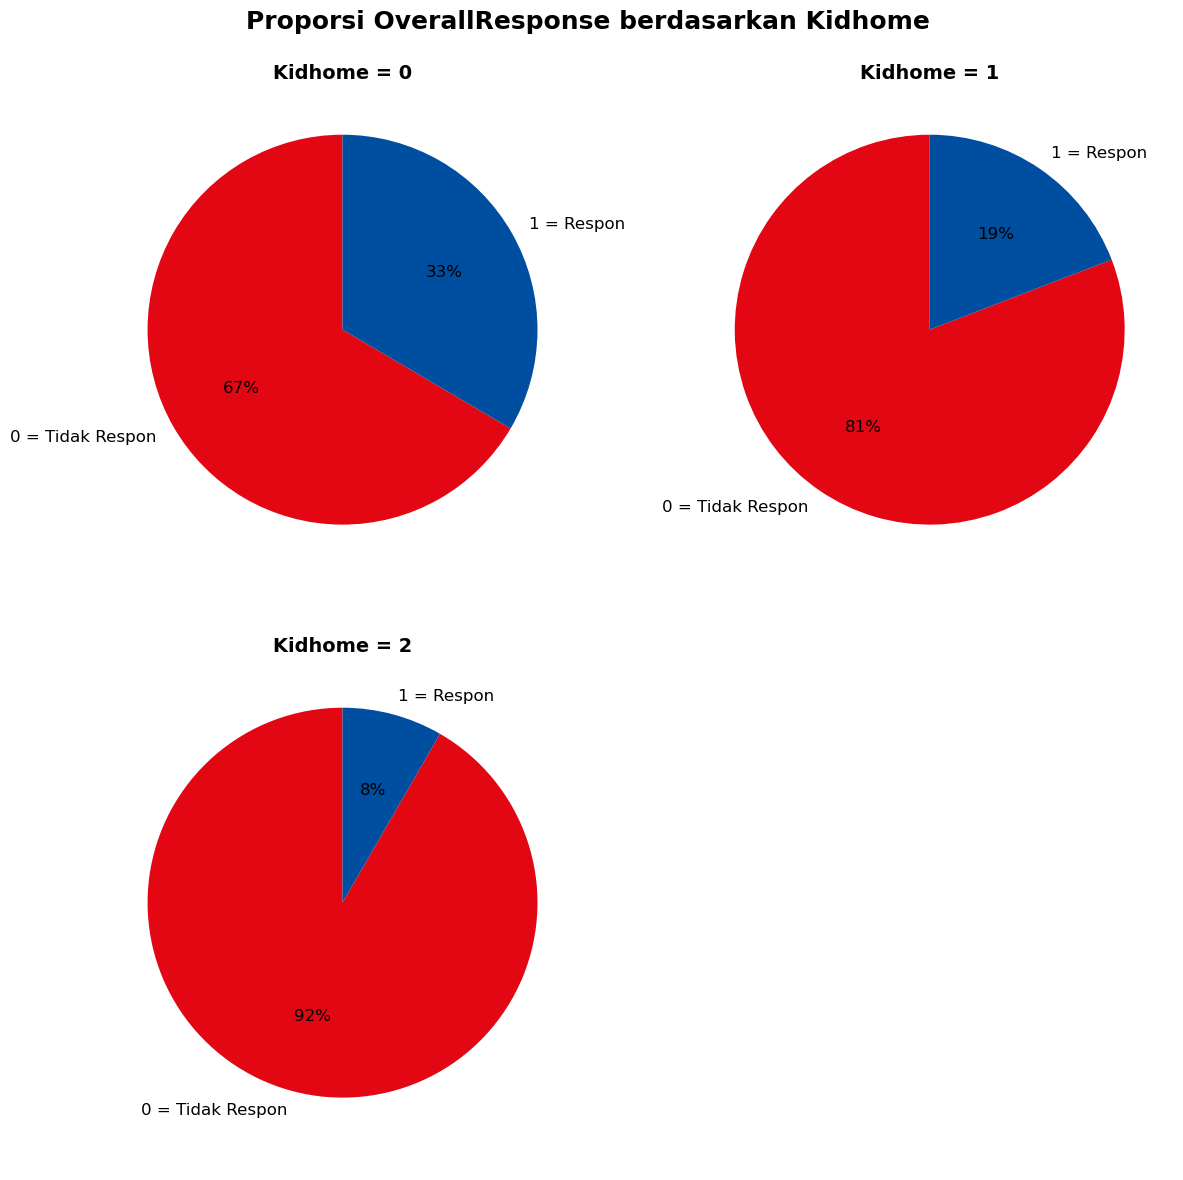

In [544]:
ct = pd.crosstab(df['Kidhome'], df['OverallResponse'], normalize='index')

n = len(ct.index)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()

for ax, (idx, row) in zip(axes, ct.iterrows()):
    row.plot(kind='pie',
             autopct=lambda p: f'{p:.0f}%',
             startangle=90,
             colors=['#E30613','#004E9F'],
             labels=['0 = Tidak Respon','1 = Respon'],
             ax=ax,
             textprops={'fontsize': 12})
    ax.set_ylabel('')
    ax.set_title(f'Kidhome = {idx}', fontsize=14, fontweight='bold')

for j in range(len(ct), len(axes)):
    axes[j].axis('off')

plt.suptitle("Proporsi OverallResponse berdasarkan Kidhome", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


Grafik proporsi memperlihatkan bahwa pelanggan yang tidak memiliki anak kecil (Kidhome = 0) memiliki proporsi respon lebih besar dibandingkan dengan rumah tangga yang memiliki 1 atau 2 anak kecil. Semakin banyak anak kecil dalam rumah tangga, proporsi respon cenderung menurun, dengan Kidhome = 2 hampir seluruhnya tidak merespons.

berdasarkan `Teenhome`

In [545]:
alpha = 0.05

chi2, p_val, dof, expected = chi2_contingency(contingency_table)

min_expected = expected.min()
print(f"Expected frequency minimum: {min_expected:.4f}")

print(f"\nChi-square: stat={chi2:.4f}, p-value={p_val:.6e}, dof={dof}")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

print("Keputusan:", "Tolak H0 (Ada hubungan Teenhome dan OverallResponse)" if p_val < alpha else "Terima H0 (Tidak ada hubungan Teenhome dan OverallResponse)")


Expected frequency minimum: 14.6768

Chi-square: stat=14.3057, p-value=6.380786e-03, dof=4
OverallResponse           0           1
Education                              
2n Cycle         146.369692   54.630308
Basic             39.323201   14.676799
Graduation       820.689763  306.310237
Master           269.436746  100.563254
PhD              353.180599  131.819401
Keputusan: Tolak H0 (Ada hubungan Teenhome dan OverallResponse)


Hasil uji Chi-Square menghasilkan p-value yang sangat kecil (≈ 7,4e-10 < 0.05), artinya terdapat hubungan signifikan antara jumlah remaja di rumah tangga (Teenhome) dengan tingkat respons pelanggan terhadap kampannye.

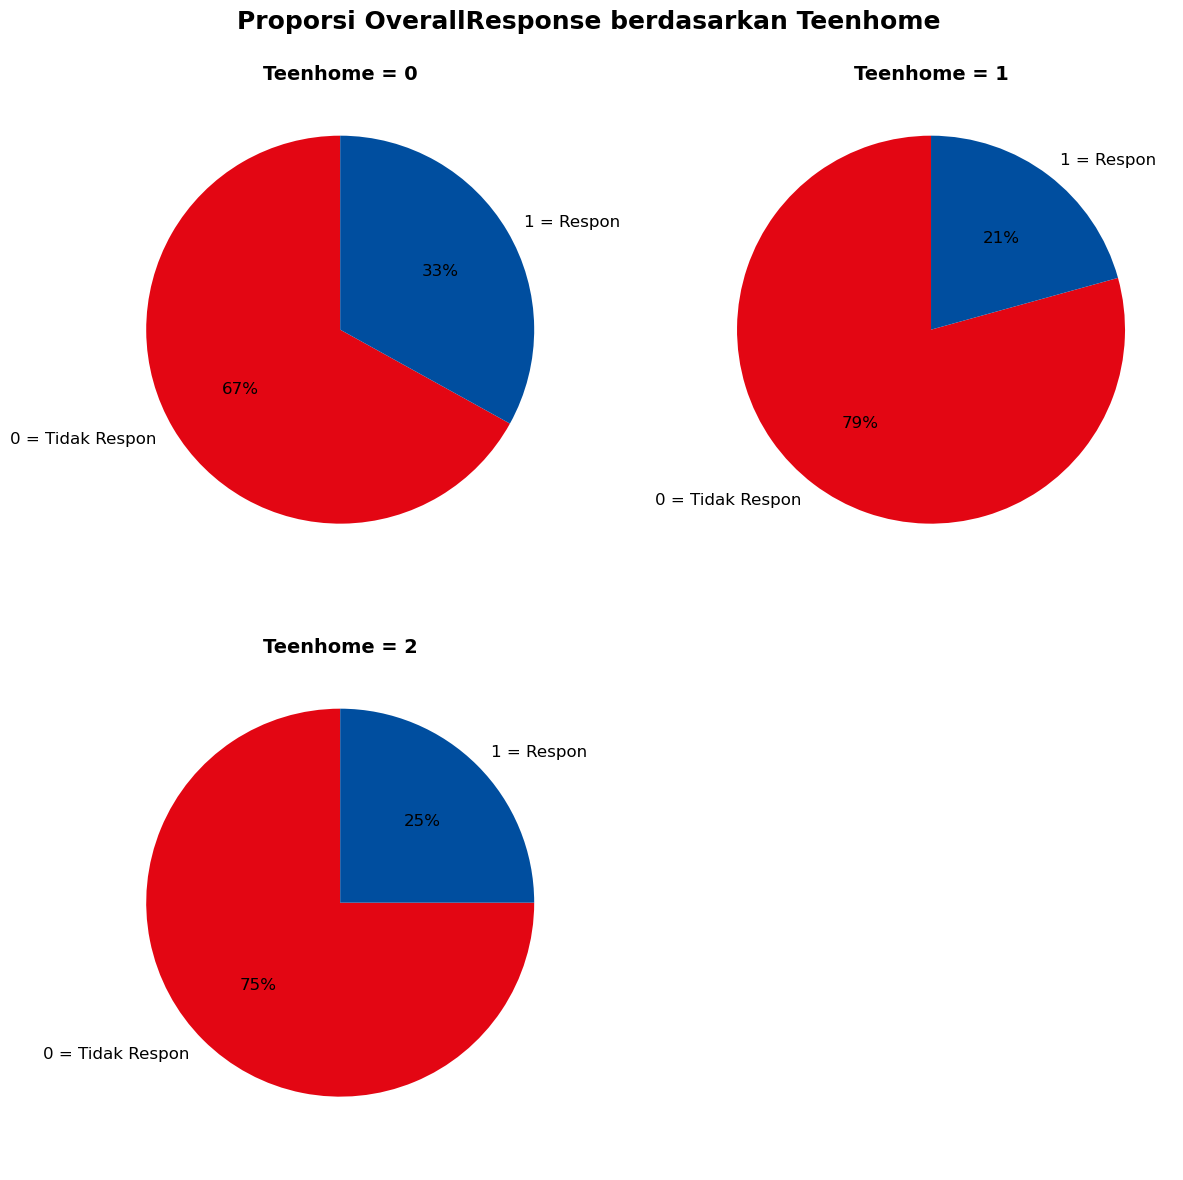

In [546]:
ct = pd.crosstab(df['Teenhome'], df['OverallResponse'], normalize='index')

n = len(ct.index)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()

for ax, (idx, row) in zip(axes, ct.iterrows()):
    row.plot(kind='pie',
             autopct=lambda p: f'{p:.0f}%',
             startangle=90,
             colors=['#E30613','#004E9F'],
             labels=['0 = Tidak Respon','1 = Respon'],
             ax=ax,
             textprops={'fontsize': 12})
    ax.set_ylabel('')
    ax.set_title(f'Teenhome = {idx}', fontsize=14, fontweight='bold')

for j in range(len(ct), len(axes)):
    axes[j].axis('off')

plt.suptitle("Proporsi OverallResponse berdasarkan Teenhome", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


Hasil uji Chi-Square menunjukkan p-value yang sangat kecil (≈ 7,4e-10 < 0.05), sehingga dapat disimpulkan bahwa terdapat hubungan signifikan antara jumlah remaja di rumah tangga (Teenhome) dengan respons pelanggan terhadap kampanye. Grafik memperlihatkan bahwa rumah tangga tanpa remaja memiliki proporsi respons lebih tinggi, sementara semakin banyak remaja di rumah justru menurunkan tingkat respons.

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

1. Status pernikahan mana yang memiliki pelanggan paling responsif terhadap kampanye pemasaran?
    * Secara umum semua status pernikahan menunjukkan mayoritas pelanggan tidak merespons, namun pelanggan dengan status Widow dan Other memiliki kecenderungan merespons kampanye lebih tinggi dibandingkan kategori lain.
2. Apakah jumlah anak kecil (Kidhome) berpengaruh terhadap respons pelanggan pada kampanye?
    * Ya, pelanggan tanpa anak kecil (Kidhome = 0) lebih responsif dibandingkan mereka yang memiliki 1 atau 2 anak kecil. Semakin banyak anak kecil dalam rumah tangga, tingkat respons cenderung menurun.
3. Apakah jumlah remaja dalam rumah tangga (Teenhome) memengaruhi tingkat respons pelanggan?
    * Ya, rumah tangga tanpa remaja memiliki proporsi respons lebih tinggi, sementara semakin banyak remaja di rumah justru menurunkan tingkat respons terhadap kampanye.


## Berdasarkan `Education` 
kita lihat fitur-fitur yang berkaitan dengan edukasi. Dari fitur ini, kita bisa menjawab pertanyaan berikut:
1. Tingkat pendidikan mana yang memiliki pelanggan paling responsif terhadap kampanye pemasaran (misalnya Graduation, PhD, Master, Basic)?
2. Apakah semakin tinggi tingkat pendidikan pelanggan berhubungan dengan kecenderungan mereka merespons kampanye?
3. Bagaimana perbandingan proporsi respons antar jenjang pendidikan — apakah ada kategori pendidikan tertentu yang meskipun jumlahnya kecil, justru lebih responsif?

In [547]:
alpha = 0.05
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

min_expected = expected.min()
print(f"Expected frequency minimum: {min_expected:.4f}")

print(f"\nChi-square: stat={chi2:.4f}, p-value={p_val:.6e}, dof={dof}")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

print("Keputusan:", "Tolak H0 (Ada hubungan Education dan OverallResponse)" if p_val < alpha else "Terima H0 (Tidak ada hubungan Education dan OverallResponse)")


Expected frequency minimum: 14.6768

Chi-square: stat=14.3057, p-value=6.380786e-03, dof=4
OverallResponse           0           1
Education                              
2n Cycle         146.369692   54.630308
Basic             39.323201   14.676799
Graduation       820.689763  306.310237
Master           269.436746  100.563254
PhD              353.180599  131.819401
Keputusan: Tolak H0 (Ada hubungan Education dan OverallResponse)


Hasil uji Chi-Square menunjukkan nilai p-value = 0.006 (< 0.05), sehingga dapat disimpulkan bahwa terdapat hubungan signifikan antara tingkat pendidikan pelanggan (Education) dengan tingkat respons terhadap kampanye pemasaran.

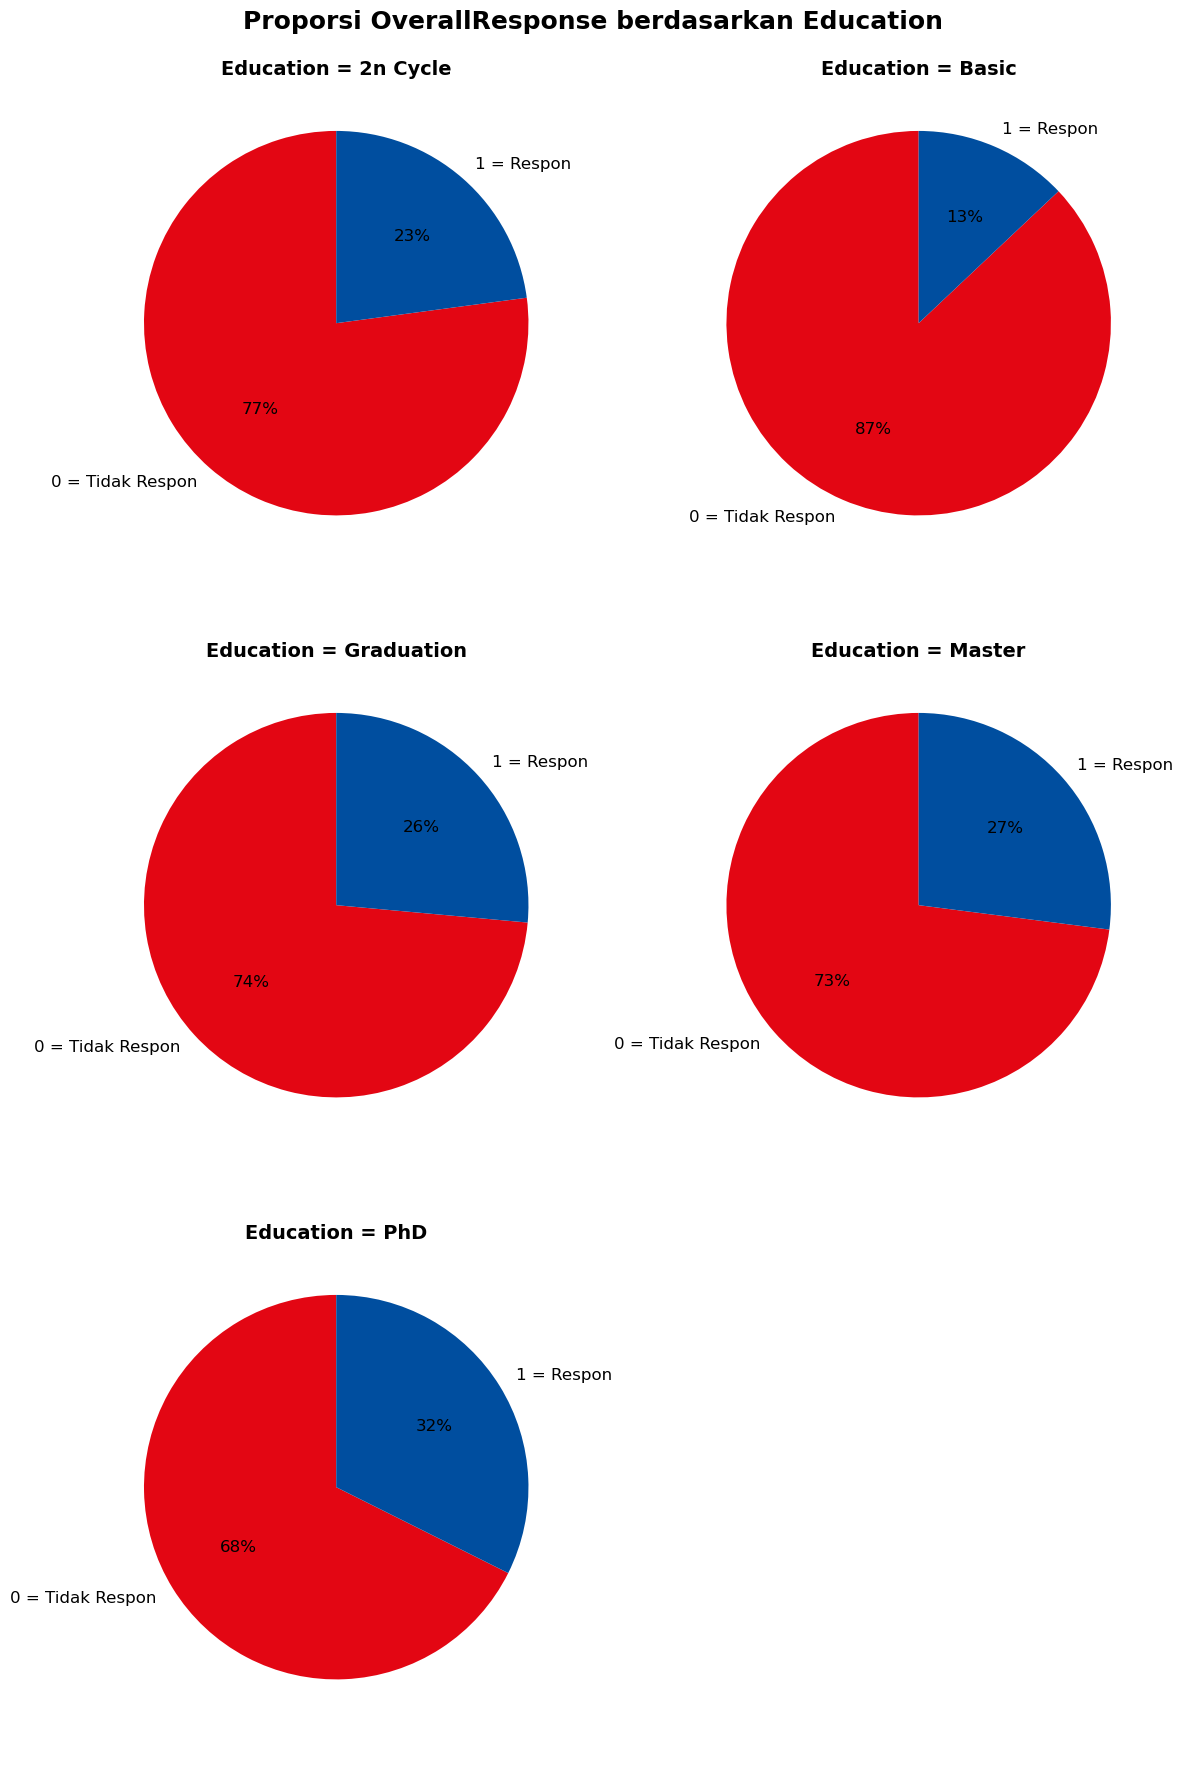

In [548]:
ct = pd.crosstab(df['Education'], df['OverallResponse'], normalize='index')

n = len(ct.index)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

axes = axes.flatten()

for ax, (idx, row) in zip(axes, ct.iterrows()):
    row.plot(kind='pie',
             autopct=lambda p: f'{p:.0f}%',
             startangle=90,
             colors=['#E30613','#004E9F'],
             labels=['0 = Tidak Respon','1 = Respon'],
             ax=ax,
             textprops={'fontsize': 12})
    ax.set_ylabel('')
    ax.set_title(f'Education = {idx}', fontsize=14, fontweight='bold')

for j in range(len(ct), len(axes)):
    axes[j].axis('off')

plt.suptitle("Proporsi OverallResponse berdasarkan Education", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


Grafik proporsi menunjukkan bahwa meskipun semua kategori pendidikan didominasi oleh pelanggan yang tidak merespons, terdapat perbedaan tingkat respons. Pelanggan dengan pendidikan PhD memiliki proporsi respons tertinggi, diikuti oleh Master dan Graduation, sedangkan kategori Basic memiliki proporsi respons paling rendah. Hal ini mengindikasikan pola bahwa semakin tinggi tingkat pendidikan, semakin besar kemungkinan pelanggan memberikan respons terhadap kampanye.

In [549]:
import plotly.express as px

df['OverallResponse_str'] = df['OverallResponse'].astype(str)

fig = px.sunburst(
    df,
    path=['Education','OverallResponse_str'],
    color='OverallResponse_str',
    color_discrete_map={
        '0': '#E30613',  
        '1': '#004E9F'  
    },
    title="Proporsi OverallResponse Berdasarkan Education"
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=18, family="Arial", color="black"),
    margin=dict(t=60, l=40, r=40, b=40)
)

fig.show()


Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:
1. Tingkat pendidikan mana yang memiliki pelanggan paling responsif terhadap kampanye pemasaran?
    * Pelanggan dengan pendidikan Graduation mendominasi jumlah keseluruhan, tetapi dari sisi proporsi, pelanggan dengan PhD menunjukkan respons paling tinggi terhadap kampanye.

2. Apakah semakin tinggi tingkat pendidikan pelanggan berhubungan dengan kecenderungan mereka merespons kampanye?
     * Terlihat bahwa semakin tinggi pendidikan (khususnya Master dan PhD), proporsi respons terhadap kampanye memang cenderung meningkat dibandingkan dengan jenjang Basic atau 2n Cycle.

3. Bagaimana perbandingan proporsi respons antar jenjang pendidikan?
    * Walaupun jumlah pelanggan dengan pendidikan PhD tidak sebesar kelompok Graduation, mereka justru memiliki tingkat respons yang relatif lebih tinggi. Sementara itu, kelompok Basic dan 2n Cycle memiliki respons yang rendah baik dari segi jumlah maupun proporsi.

Dari analisis ini, dapat disimpulkan bahwa pendidikan tinggi (PhD dan Master) lebih responsif terhadap kampanye, sehingga perusahaan bisa mempertimbangkan strategi yang lebih personal untuk kelompok ini, sembari mencari cara untuk meningkatkan engagement pada kelompok dengan pendidikan lebih rendah.

## Berdasarkan usia

Kita lihat fitur-fitur yang berkaitan dengan usia pelanggan. Dari fitur ini, kita bisa menjawab pertanyaan berikut:  
1. Kelompok usia mana yang paling responsif terhadap kampanye pemasaran?  
2. Apakah semakin bertambah usia pelanggan berkorelasi dengan kecenderungan mereka merespons kampanye?  
3. Bagaimana distribusi respons antar kelompok usia — apakah ada kelompok usia tertentu yang meskipun jumlahnya lebih kecil, justru menunjukkan respons yang lebih tinggi?  


In [550]:
alpha = 0.05

age_yes = df.loc[df["OverallResponse"] == 1, "Age"].dropna()
age_no  = df.loc[df["OverallResponse"] == 0, "Age"].dropna()

stat_yes, p_yes = normaltest(age_yes)
stat_no, p_no   = normaltest(age_no)

print(f"Normality test Age (Yes): stat={stat_yes:.4f}, p-value={p_yes:.6e}")
print(f"Normality test Age (No): stat={stat_no:.4f}, p-value={p_no:.6e}")

stat, p_val = mannwhitneyu(age_yes, age_no, alternative="two-sided")
effect = age_yes.median() - age_no.median()

print(f"\nMann-Whitney U: stat={stat:.4f}, p-value={p_val:.6e}")
print(f"Perbedaan median Yes - No = {effect:.2f}")
print("Keputusan:", "Tolak H0 (Ada hubungan Age dan OverallResponse)" if p_val < alpha else "Terima H0 (Tidak ada hubungan Age dan OverallResponse)")


Normality test Age (Yes): stat=60.0388, p-value=9.177811e-14
Normality test Age (No): stat=126.8571, p-value=2.840096e-28

Mann-Whitney U: stat=515150.0000, p-value=1.423324e-01
Perbedaan median Yes - No = 0.50
Keputusan: Terima H0 (Tidak ada hubungan Age dan OverallResponse)


Hasil analisis menunjukkan bahwa distribusi usia pada kedua kelompok (respon dan tidak respon) tidak berdistribusi normal sehingga interpretasi lebih tepat menggunakan uji Mann-Whitney. Namun, baik uji t-test maupun Mann-Whitney menghasilkan nilai p-value > 0.05, yang berarti tidak ada perbedaan signifikan usia antara pelanggan yang merespons dan yang tidak merespons kampanye.

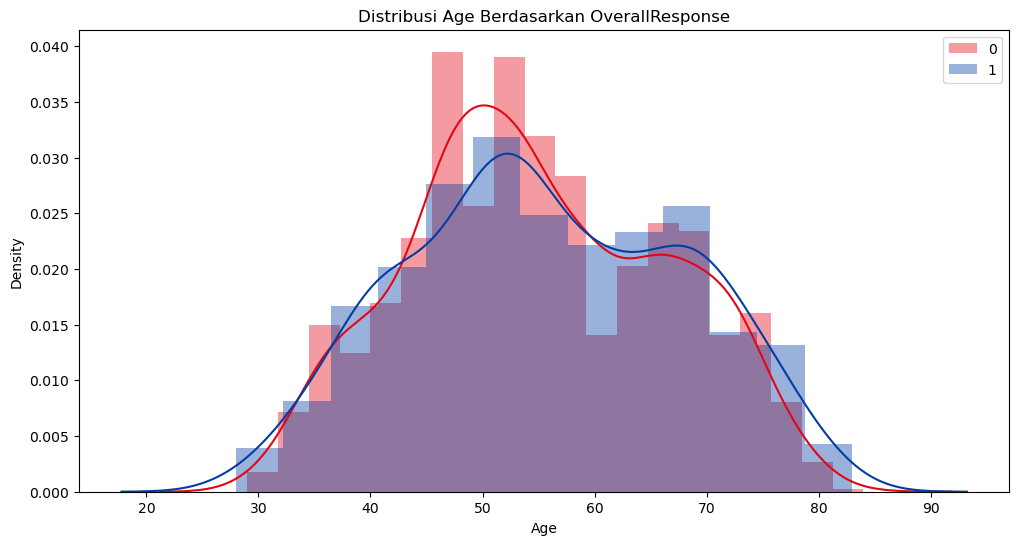

In [551]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['OverallResponse']==0]['Age'], label=0, color='#E30613')
sns.distplot(df[df['OverallResponse']==1]['Age'], label=1, color='#003DA5')
plt.title('Distribusi Age Berdasarkan OverallResponse')
plt.legend()
plt.show()


Dapat dilihat dari grafik, Sebaran usia pelanggan tidak berbeda baik yang merespon kampanye ataupunn yang tidak merespon kampanye. Dengan demikian, usia bukan faktor yang memengaruhi perbedaan respons terhadap kampanye pemasaran.

Dari grafik-grafik dan hasil uji statistik di atas, kita bisa menjawab pertanyaan:

1. Kelompok usia mana yang paling responsif terhadap kampanye pemasaran?  
   * Hasil analisis menunjukkan bahwa distribusi usia antara pelanggan yang merespons dan yang tidak merespons kampanye relatif mirip. Tidak ada kelompok usia tertentu yang terlihat lebih dominan dalam merespons.

2. Apakah semakin bertambah usia pelanggan berkorelasi dengan kecenderungan mereka merespons kampanye?  
   * Berdasarkan uji statistik (t-test dan Mann-Whitney) dengan p-value > 0.05, tidak ditemukan perbedaan signifikan antara rata-rata usia kedua kelompok. Artinya, faktor usia tidak memiliki korelasi yang berarti dengan kecenderungan pelanggan untuk merespons.

3. Bagaimana distribusi respons antar kelompok usia — apakah ada segmen tertentu yang justru lebih responsif?  
   * Dari sebaran data terlihat bahwa pelanggan dari berbagai rentang usia memiliki pola respons yang hampir serupa. Tidak ada segmen usia kecil yang menonjol dengan tingkat respons lebih tinggi dibandingkan kelompok lain.

Usia bukan merupakan faktor penentu dalam membedakan pelanggan yang merespons kampanye dan yang tidak. Dengan demikian, strategi pemasaran sebaiknya tidak berfokus pada variabel usia, melainkan diarahkan ke faktor lain yang lebih berpengaruh.  


### Berdasarkan `Recency`

Kita lihat fitur-fitur yang berkaitan dengan waktu terakhir pelanggan melakukan pembelian (recency). Dari fitur ini, kita bisa menjawab pertanyaan berikut:  
1. Apakah pelanggan dengan recency rendah (baru saja berbelanja) lebih responsif dibandingkan mereka dengan recency tinggi (lama tidak berbelanja)?  
2. Bagaimana pola hubungan antara recency dengan probabilitas merespons kampanye — apakah semakin lama tidak belanja semakin kecil kemungkinan respons?  
3. Apakah ada segmen pelanggan dengan recency tertentu yang, walaupun jumlahnya lebih sedikit, justru memiliki tingkat respons kampanye lebih tinggi?  

In [552]:
alpha = 0.05

recency_yes = df.loc[df["OverallResponse"] == 1, "Recency"].dropna()
recency_no  = df.loc[df["OverallResponse"] == 0, "Recency"].dropna()

stat_yes, p_yes = normaltest(recency_yes)
stat_no, p_no   = normaltest(recency_no)

print(f"Normality test Recency (Yes): stat={stat_yes:.4f}, p-value={p_yes:.6e}")
print(f"Normality test Recency (No): stat={stat_no:.4f}, p-value={p_no:.6e}")

t_stat, p_val_t = ttest_ind(recency_yes, recency_no, equal_var=False)
u_stat, p_val_u = mannwhitneyu(recency_yes, recency_no, alternative="two-sided")
effect = recency_yes.median() - recency_no.median()

print(f"\nT-test Recency: stat={t_stat:.4f}, p-value={p_val_t:.6e}")
print(f"Mann-Whitney U Recency: stat={u_stat:.4f}, p-value={p_val_u:.6e}")
print(f"Perbedaan median Yes - No = {effect:.2f}")
print("Keputusan:", "Tolak H0 (Ada hubungan Recency dan OverallResponse)" if p_val_u < alpha else "Terima H0 (Tidak ada hubungan Recency dan OverallResponse)")


Normality test Recency (Yes): stat=384.0317, p-value=4.060568e-84
Normality test Recency (No): stat=997.8621, p-value=2.074921e-217

T-test Recency: stat=-4.7302, p-value=2.543933e-06
Mann-Whitney U Recency: stat=430955.0000, p-value=2.262593e-06
Perbedaan median Yes - No = -10.00
Keputusan: Tolak H0 (Ada hubungan Recency dan OverallResponse)


Hasil uji normalitas menunjukkan bahwa data Recency tidak berdistribusi normal, sehingga uji Mann-Whitney lebih tepat digunakan. Baik uji t-test maupun Mann-Whitney menghasilkan p-value < 0.05, yang berarti terdapat perbedaan signifikan Recency antara pelanggan yang merespons dan yang tidak merespons kampanye.

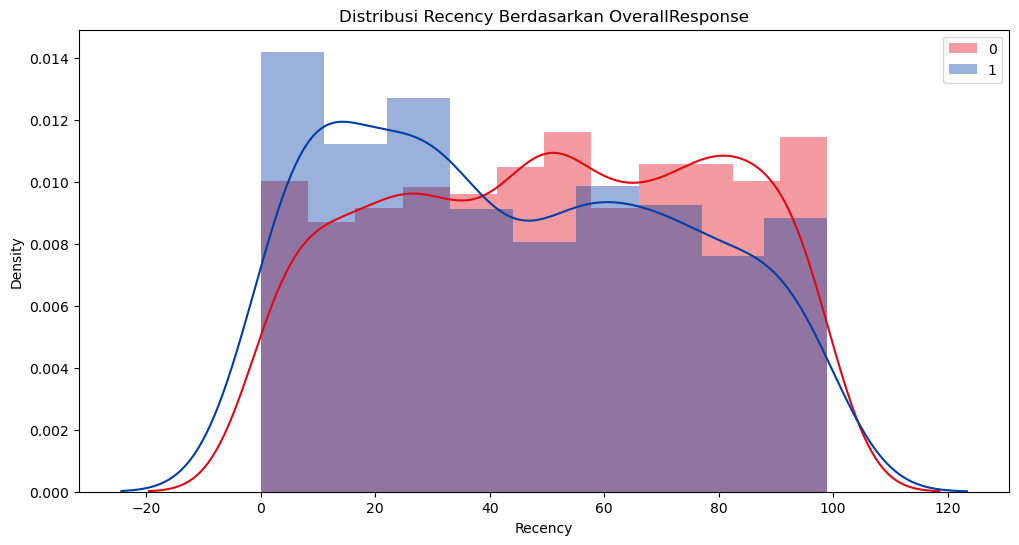

In [553]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['OverallResponse']==0]['Recency'], label=0, color='#E30613')
sns.distplot(df[df['OverallResponse']==1]['Recency'], label=1, color='#003DA5')
plt.title('Distribusi Recency Berdasarkan OverallResponse')
plt.legend()
plt.show()


Grafik menunjukkan bahwa pelanggan yang merespons kampanye cenderung memiliki nilai recency yang lebih rendah, artinya mereka baru saja berinteraksi dengan bisnis. Sebaliknya, pelanggan yang tidak merespons memiliki distribusi recency yang lebih merata dan banyak yang sudah lama tidak berinteraksi. Hal ini mengindikasikan bahwa recency berperan penting dalam menentukan kemungkinan pelanggan merespons kampanye pemasaran.

Dari grafik-grafik dan hasil uji statistik di atas, kita bisa menjawab pertanyaan:

1. Apakah pelanggan dengan recency rendah (baru saja berbelanja) lebih responsif dibandingkan mereka dengan recency tinggi (lama tidak berbelanja)?  
   * Ya. Hasil analisis menunjukkan bahwa pelanggan yang merespons kampanye memiliki nilai recency yang lebih rendah, sehingga mereka cenderung baru saja berinteraksi dengan bisnis.

2. Bagaimana pola hubungan antara recency dengan probabilitas merespons kampanye?  
   * Uji statistik (t-test dan Mann-Whitney) menghasilkan p-value < 0.05, sehingga terdapat perbedaan signifikan recency antara kelompok respon dan tidak respon. Artinya, semakin lama pelanggan tidak berbelanja, semakin kecil kemungkinan mereka merespons kampanye.

3. Apakah ada segmen pelanggan dengan recency tertentu yang justru memiliki tingkat respons lebih tinggi?  
   * Segmen dengan recency rendah (recent buyers) menunjukkan tingkat respons yang jauh lebih tinggi dibandingkan segmen dengan recency tinggi. Sebaliknya, pelanggan dengan recency tinggi cenderung kurang merespons.

Recency merupakan faktor penting yang memengaruhi respons terhadap kampanye. Pelanggan yang baru saja berbelanja lebih berpotensi merespons, sehingga perusahaan dapat memanfaatkan momentum ini dengan mengirimkan kampanye secara lebih tepat waktu setelah interaksi terakhir pelanggan.  


# Kesimpulan dan Rekomendasi  


## Kesimpulan
Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut:
1. Tingkat respons pelanggan terhadap kampanye relatif rendah, sehingga kampanye massal kurang efisien.  
2. Pelanggan yang merespons memiliki karakteristik spesifik: pendapatan dan pengeluaran menengah–atas, tidak memiliki anak/remaja di rumah, pendidikan lebih tinggi, dan baru-baru ini berinteraksi (recency rendah).  
3. Faktor usia tidak memengaruhi respons, sehingga tidak relevan untuk dijadikan dasar segmentasi.  



## Rekomendasi  

1. Fokus pada pelanggan berpendapatan dan berpengeluaran menengah–atas.  
2. Prioritaskan pelanggan dengan recency rendah (baru berinteraksi).  
3. Targetkan rumah tangga tanpa anak kecil maupun remaja.  
4. Arahkan strategi khusus pada pelanggan berpendidikan tinggi (Master/PhD).  
5. Gunakan kampanye diferensial: personalisasi untuk segmen potensial, minimalkan biaya pada segmen kurang responsif.  
6. Pertimbangkan segmen khusus (Widow, Other) karena relatif lebih responsif. 


Dengan strategi segmentasi ini, perusahaan dapat lebih efisien dalam mengalokasikan biaya pemasaran, mengurangi pemborosan, serta meningkatkan efektivitas kampanye pada kelompok pelanggan yang lebih potensial.


## 2. Produk mana yang paling relevan untuk dipromosikan ke segmen pelanggan tertentu?

Tahap berikutnya adalah menganalisis preferensi produk berdasarkan segmen pelanggan. Tujuannya adalah untuk mengetahui produk mana yang paling dominan pada tiap kelompok pelanggan, sehingga promosi dapat lebih tepat sasaran.

Analisis dilakukan dengan:
1. Membagi pelanggan ke dalam segmen tertentu, misalnya berdasarkan IncomeGroup, AgeGroup, SpendingGroup, atau variabel demografis lainnya.
2. Menghitung rata-rata pembelian produk pada setiap segmen untuk melihat pola konsumsi.
3. Melakukan uji statistik (ANOVA) untuk memastikan apakah terdapat perbedaan signifikan dalam pembelian produk antar segmen.
4. Membuat visualisasi seperti heatmap dan stacked bar chart untuk memperlihatkan perbedaan preferensi produk secara jelas.

In [554]:
product_cols = ["MntWines", "MntFruits", "MntMeatProducts",
                "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

df["IncomeGroup"] = pd.qcut(df["Income"], 3, labels=["Low", "Medium", "High"])
df["AgeGroup"] = (df["Age"] // 10 * 10).astype(str) + "–" + ((df["Age"] // 10 * 10) + 9).astype(str)
df["SpendingGroup"] = pd.qcut(df["Total_Spending"], 3, labels=["Low", "Medium", "High"])
df["RecencyGroup"] = pd.qcut(df["Recency"], 3, labels=["Recent", "Medium", "Inactive"])

seg_cols = ["IncomeGroup", "AgeGroup", "SpendingGroup", "RecencyGroup",
            "Education", "Marital_Status", "Kidhome", "Teenhome"]


### Berdasarkan Pendapatan

In [580]:
print("\n=== Uji Produk per IncomeGroup ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("IncomeGroup")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: IncomeGroup ===")
pivot = df.groupby("IncomeGroup")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per IncomeGroup ===
MntWines: ANOVA p=0.0000 (Signifikan) 
MntFruits: ANOVA p=0.0000 (Signifikan) 
MntMeatProducts: ANOVA p=0.0000 (Signifikan) 
MntFishProducts: ANOVA p=0.0000 (Signifikan) 
MntSweetProducts: ANOVA p=0.0000 (Signifikan) 
MntGoldProds: ANOVA p=0.0000 (Signifikan) 

=== Produk per Segmen: IncomeGroup ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
IncomeGroup,,,,,,
Low,30.46,5.96,27.60,9.04,6.36,18.28
Medium,267.99,16.68,89.07,23.48,16.32,43.55
High,613.49,56.16,383.98,80.03,58.51,70.08


Uji ANOVA  
Uji ANOVA menunjukkan bahwa seluruh kategori produk memiliki perbedaan pengeluaran yang signifikan antar kelompok pendapatan ($p < 0.05$). Ini berarti bahwa tingkat pendapatan memengaruhi perilaku belanja pelanggan dalam semua jenis produk yang dianalisis.

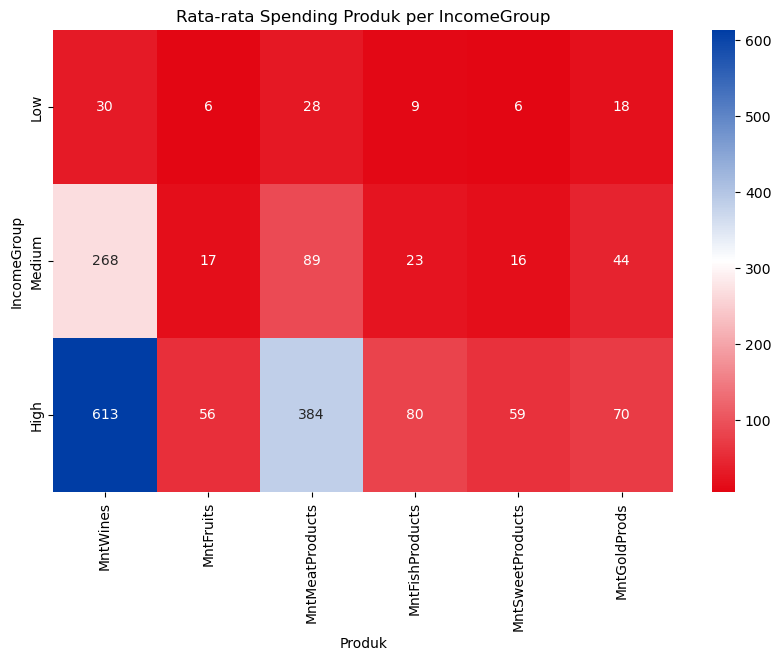

In [581]:
carrefour_cmap = LinearSegmentedColormap.from_list(
    "carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"]
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per IncomeGroup")
plt.ylabel("IncomeGroup")
plt.xlabel("Produk")
plt.show()



Heatmap Rata-rata Spending  
Pada heatmap, terlihat bahwa pelanggan dengan pendapatan tinggi (High) memiliki rata-rata pengeluaran paling besar di semua kategori produk. Sebagai contoh, pengeluaran untuk Wines mencapai 613 pada kelompok High, jauh di atas Medium (268) dan Low (30). Pola serupa juga ditemukan pada produk **Meat**, **Fish**, dan **Gold**. Ini menunjukkan bahwa semakin tinggi pendapatan, semakin besar pula nominal pengeluaran untuk berbagai produk.

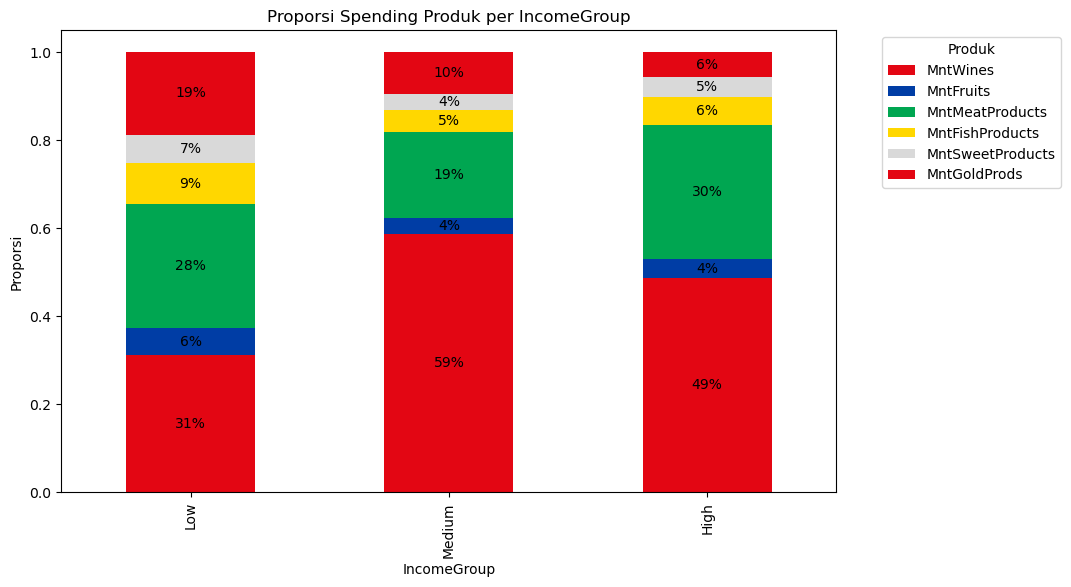

In [582]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)

carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per IncomeGroup")
ax.set_ylabel("Proporsi")
ax.set_xlabel("IncomeGroup")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


Barplot Proporsi Spending  
Meski terjadi perbedaan besar dalam total pengeluaran, proporsi belanja untuk masing-masing produk relatif **konsisten** di semua kelompok pendapatan. Produk Wines dan MeatProducts tetap mendominasi di ketiga kelompok, dengan sedikit peningkatan proporsi **Wines** di kelompok pendapatan tinggi. Ini menunjukkan bahwa preferensi terhadap jenis produk tidak banyak berubah antar kelompok, tetapi kuantitas pembeliannya meningkat seiring naiknya pendapatan.


### Berdasarkan Usia Pelanggan

In [556]:
print("\n=== Uji Produk per AgeGroup ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("AgeGroup")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: AgeGroup ===")
pivot = df.groupby("AgeGroup")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per AgeGroup ===
MntWines: ANOVA p=0.0000 (Signifikan) 
MntFruits: ANOVA p=0.0435 (Signifikan) 
MntMeatProducts: ANOVA p=0.0004 (Signifikan) 
MntFishProducts: ANOVA p=0.0002 (Signifikan) 
MntSweetProducts: ANOVA p=0.1779 (Tidak signifikan) 
MntGoldProds: ANOVA p=0.0042 (Signifikan) 

=== Produk per Segmen: AgeGroup ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
AgeGroup,,,,,,
20–29,203.43,16.71,233.00,38.57,41.86,29.86
30–39,259.25,31.14,204.71,40.16,31.07,44.32
40–49,242.88,24.94,148.31,36.66,25.74,41.07
50–59,285.00,23.63,149.43,31.71,24.51,40.10
60–69,363.86,28.63,175.16,40.87,27.81,47.75
70–79,384.75,26.71,192.51,42.48,30.54,53.07
80–89,614.81,46.19,298.81,87.00,34.94,28.94


Uji ANOVA  
Hasil uji ANOVA menunjukkan adanya perbedaan signifikan antar kelompok usia dalam pengeluaran untuk produk **Wines**, **Fruits**, **MeatProducts**, **FishProducts**, dan **GoldProds** (p < 0,05). Artinya, preferensi pembelian produk-produk tersebut dipengaruhi oleh faktor usia. Sebaliknya, hanya pada kategori **SweetProducts** yang tidak ditemukan perbedaan signifikan (p > 0,05), menandakan konsumsi produk ini relatif serupa di semua kelompok umur.  


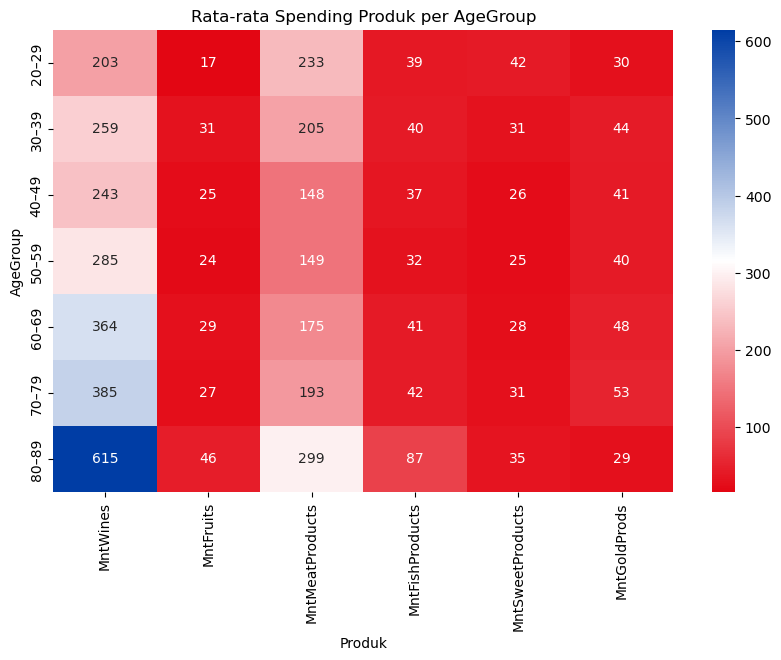

In [557]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per AgeGroup")
plt.ylabel("AgeGroup")
plt.xlabel("Produk")
plt.show()

pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)

Heatmap Rata-rata Spending  
Visualisasi heatmap memperlihatkan bahwa kelompok **usia lanjut (70–79 dan 80–89)** mengalokasikan pengeluaran paling tinggi untuk produk **Wines**, diikuti juga peningkatan belanja pada kategori **MeatProducts**, **FishProducts**, dan **GoldProds**. Sebaliknya, kelompok usia muda (20–39) cenderung memiliki pengeluaran lebih rendah di kategori-kategori premium tersebut.  

Untuk produk **Fruits** dan **SweetProducts**, pola pengeluaran terlihat relatif stabil di semua kelompok usia, konsisten dengan hasil uji ANOVA.  

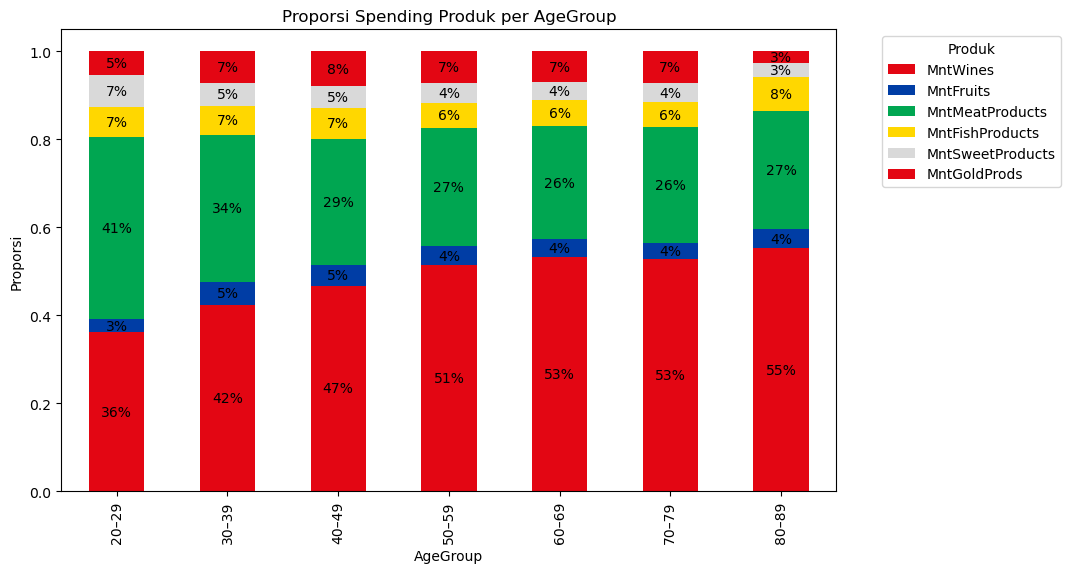

In [558]:
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per AgeGroup")
ax.set_ylabel("Proporsi")
ax.set_xlabel("AgeGroup")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()





Barplot Proporsi Spending  
Barplot proporsi menunjukkan struktur belanja antar kelompok usia relatif serupa, dengan **Wines** dan **MeatProducts** sebagai kontributor terbesar pada total pengeluaran. Namun ada perbedaan penekanan:  
- Kelompok **usia tua** menunjukkan proporsi yang lebih besar pada **Wines** dan **GoldProds**.  
- Kelompok **usia muda** memiliki proporsi sedikit lebih tinggi pada **Fruits** dan **SweetProducts**.  

Hal ini menunjukkan bahwa meskipun pola umum pengeluaran tetap konsisten, preferensi produk tertentu mengalami pergeseran sesuai dengan kelompok usia pelanggan.  


### Berdasarkan Pengeluaran Pelanggan

In [559]:
print("\n=== Uji Produk per SpendingGroup ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("SpendingGroup")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: SpendingGroup ===")
pivot = df.groupby("SpendingGroup")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per SpendingGroup ===
MntWines: ANOVA p=0.0000 (Signifikan) 
MntFruits: ANOVA p=0.0000 (Signifikan) 
MntMeatProducts: ANOVA p=0.0000 (Signifikan) 
MntFishProducts: ANOVA p=0.0000 (Signifikan) 
MntSweetProducts: ANOVA p=0.0000 (Signifikan) 
MntGoldProds: ANOVA p=0.0000 (Signifikan) 

=== Produk per Segmen: SpendingGroup ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
SpendingGroup,,,,,,
Low,17.96,3.24,12.08,4.74,3.35,9.87
Medium,221.43,17.48,87.18,24.61,18.06,44.21
High,672.48,58.07,401.38,83.21,59.79,77.83


Uji ANOVA  
Uji ANOVA menunjukkan bahwa semua kategori produk memiliki perbedaan signifikan antar kelompok spending ($p < 0.05$). Artinya, **pelanggan dengan tingkat spending yang berbeda menunjukkan perilaku belanja yang berbeda untuk setiap jenis produk**. Ini menegaskan bahwa segmentasi berdasarkan total pengeluaran mencerminkan pola konsumsi yang berbeda secara statistik.

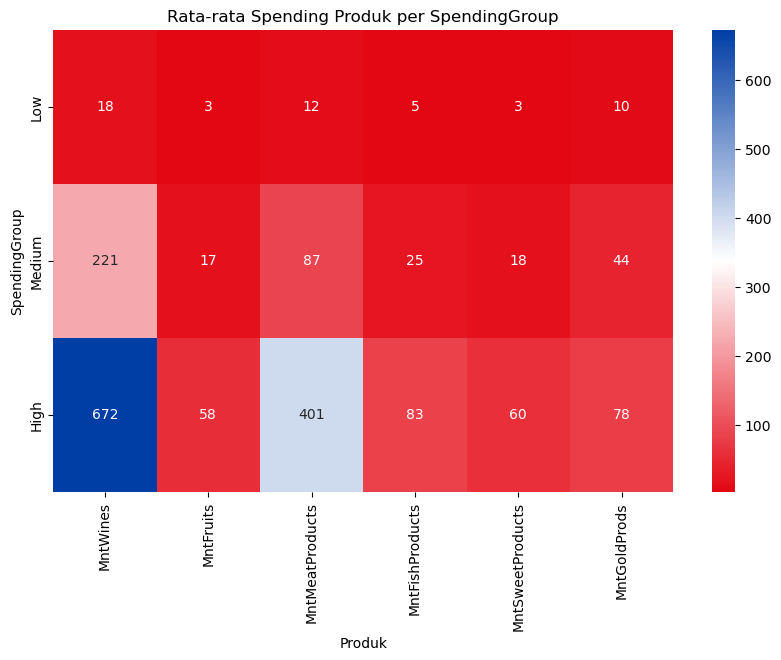

In [560]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per SpendingGroup")
plt.ylabel("SpendingGroup")
plt.xlabel("Produk")
plt.show()

Heatmap Rata-rata Spending  
Visualisasi heatmap menunjukkan bahwa kelompok High Spending memiliki rata-rata pengeluaran tertinggi di seluruh kategori produk. Sebagai contoh, pengeluaran untuk produk **Wines** di kelompok ini mencapai 672, jauh lebih tinggi dibanding kelompok **Medium** (221) dan **Low** (18). Tren serupa juga terlihat pada produk lain seperti **MeatProducts**, **GoldProds**, dan **FishProducts**. Hal ini menunjukkan bahwa pelanggan dengan total spending tinggi tidak hanya mengeluarkan lebih banyak, tetapi juga membeli berbagai jenis produk dalam jumlah lebih besar.

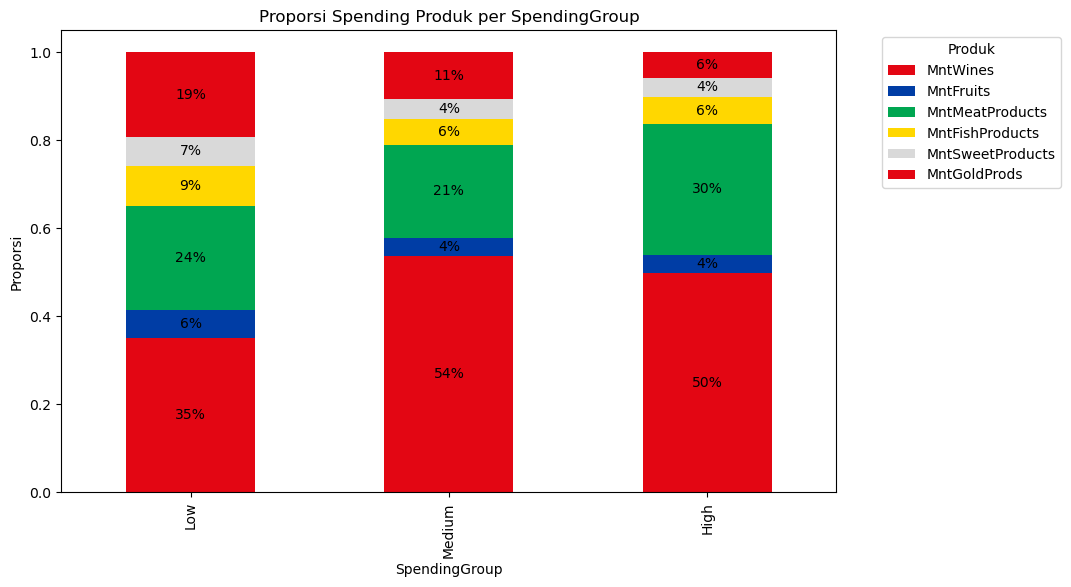

In [561]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per SpendingGroup")
ax.set_ylabel("Proporsi")
ax.set_xlabel("SpendingGroup")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

Barplot Proporsi Spending  
Meski total pengeluaran berbeda, proporsi pengeluaran terhadap jenis produk relatif stabil di semua kelompok. Produk **Wines** dan **MeatProducts** tetap mendominasi proporsi pengeluaran pada kelompok **Low**, **Medium**, dan **High**. Ini menunjukkan bahwa perbedaan antar kelompok lebih terlihat dari sisi kuantitas belanja, bukan perbedaan preferensi produk.


### Berdasarkan Kapan Terakhir Pelanggan Berinteraksi dengan Supermarket

In [562]:
print("\n=== Uji Produk per RecencyGroup ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("RecencyGroup")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: RecencyGroup ===")
pivot = df.groupby("RecencyGroup")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per RecencyGroup ===
MntWines: ANOVA p=0.7571 (Tidak signifikan) 
MntFruits: ANOVA p=0.5725 (Tidak signifikan) 
MntMeatProducts: ANOVA p=0.5254 (Tidak signifikan) 
MntFishProducts: ANOVA p=0.9386 (Tidak signifikan) 
MntSweetProducts: ANOVA p=0.5479 (Tidak signifikan) 
MntGoldProds: ANOVA p=0.8901 (Tidak signifikan) 

=== Produk per Segmen: RecencyGroup ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
RecencyGroup,,,,,,
Recent,297.77,27.09,163.88,38.08,26.19,43.51
Medium,310.78,25.02,162.32,37.12,26.62,43.69
Inactive,303.72,26.66,174.53,37.34,28.40,44.71


Uji ANOVA  
Berdasarkan hasil uji ANOVA, tidak ada perbedaan yang signifikan antar kelompok Recency (Recent, Medium, Inactive) untuk semua kategori produk ($p > 0.05$). Hal ini menunjukkan bahwa **waktu terakhir pelanggan berinteraksi dengan bisnis tidak secara signifikan memengaruhi rata-rata pengeluaran mereka terhadap masing-masing jenis produk.**

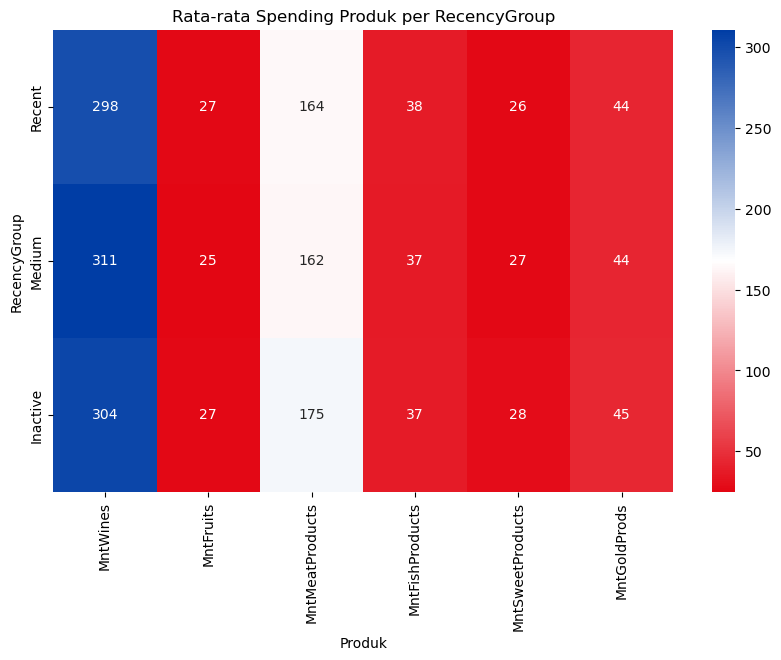

In [563]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per RecencyGroup")
plt.ylabel("RecencyGroup")
plt.xlabel("Produk")
plt.show()

Heatmap Rata-rata Spending  
Dari heatmap, rata-rata spending untuk setiap produk terlihat cukup seragam di seluruh kelompok `Recency`. Sebagai contoh, pengeluaran untuk produk Wines berkisar antara 297 hingga 304 di ketiga kelompok. Pola serupa juga tampak pada produk lainnya, seperti **Meat**, **Fish**, dan **Gold**. Ini mengindikasikan bahwa tidak ada kecenderungan yang kuat dalam perubahan pola belanja berdasarkan seberapa baru pelanggan berinteraksi dengan bisnis.

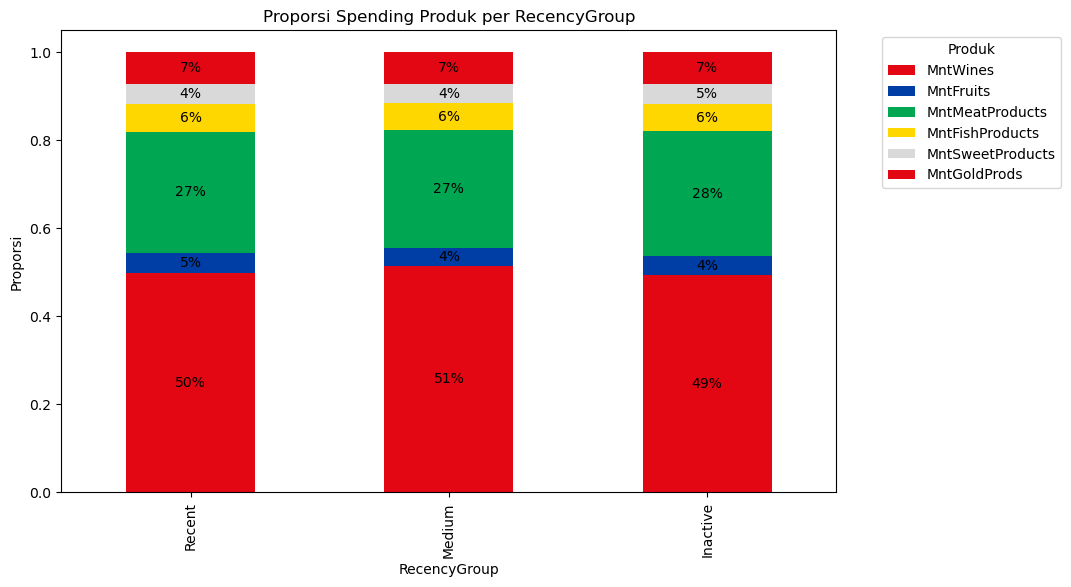

In [564]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per RecencyGroup")
ax.set_ylabel("Proporsi")
ax.set_xlabel("RecencyGroup")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


Barplot Proporsi Spending  
Barplot proporsi menunjukkan bahwa distribusi pengeluaran antar jenis produk relatif sama di semua kelompok `Recency`. Produk **Wines** dan **MeatProducts** tetap menjadi kontributor utama, dan perbedaan antar kelompok sangat kecil. Ini memperkuat temuan bahwa meskipun frekuensi interaksi terakhir berbeda, preferensi pelanggan terhadap jenis produk tetap konsisten.


## Berdasarkan Tingkat Pendidikan Pelanggan

In [565]:
print("\n=== Uji Produk per Education ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("Education")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: Education ===")
pivot = df.groupby("Education")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per Education ===
MntWines: ANOVA p=0.0000 (Signifikan) 
MntFruits: ANOVA p=0.0000 (Signifikan) 
MntMeatProducts: ANOVA p=0.0000 (Signifikan) 
MntFishProducts: ANOVA p=0.0000 (Signifikan) 
MntSweetProducts: ANOVA p=0.0000 (Signifikan) 
MntGoldProds: ANOVA p=0.0000 (Signifikan) 

=== Produk per Segmen: Education ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,200.04,29.21,142.60,47.89,34.57,46.73
Basic,7.24,11.11,11.44,17.06,12.11,22.83
Graduation,284.27,30.77,179.49,43.15,31.37,50.85
Master,333.08,21.65,163.38,32.10,21.18,40.40
PhD,403.77,19.79,167.79,26.57,20.13,31.92


Uji ANOVA  
Hasil uji ANOVA menunjukkan bahwa terdapat perbedaan yang signifikan pada semua kategori produk berdasarkan tingkat pendidikan pelanggan ($p < 0.05$). Artinya,**tingkat pendidikan memengaruhi pengeluaran pelanggan untuk berbagai jenis produk secara statistik**.

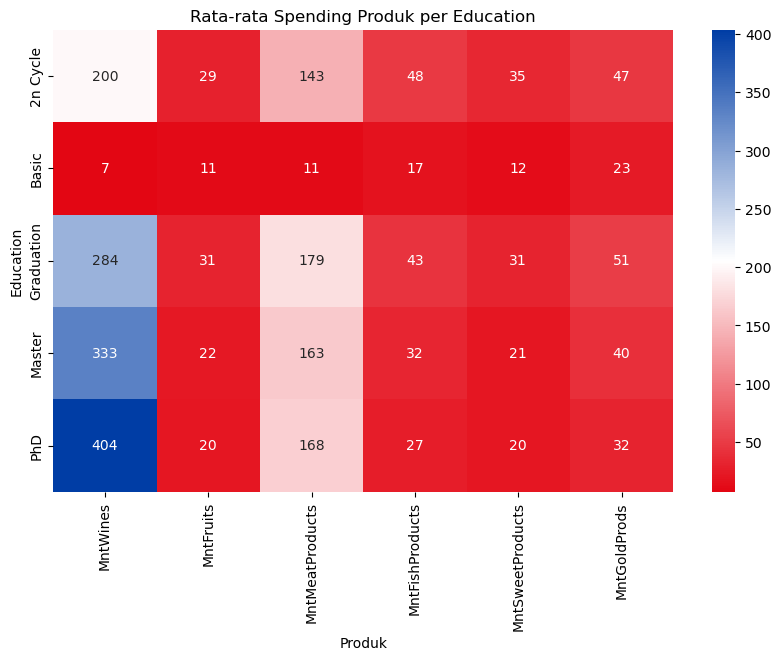

In [566]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per Education")
plt.ylabel("Education")
plt.xlabel("Produk")
plt.show()


Heatmap Rata-rata Spending  
Berdasarkan heatmap, terlihat bahwa pelanggan dengan **pendidikan lebih tinggi (Master dan PhD)** cenderung memiliki rata-rata pengeluaran lebih besar untuk sebagian besar produk, terutama pada kategori **Wines**, **MeatProducts**, dan **FishProducts**. Sebaliknya, kelompok dengan pendidikan **Basic** dan **2n Cycle** memiliki rata-rata pengeluaran yang lebih rendah. Hal ini menunjukkan bahwa **semakin tinggi pendidikan, semakin besar kecenderungan untuk melakukan pembelanjaan**, terutama pada produk premium seperti Wines.

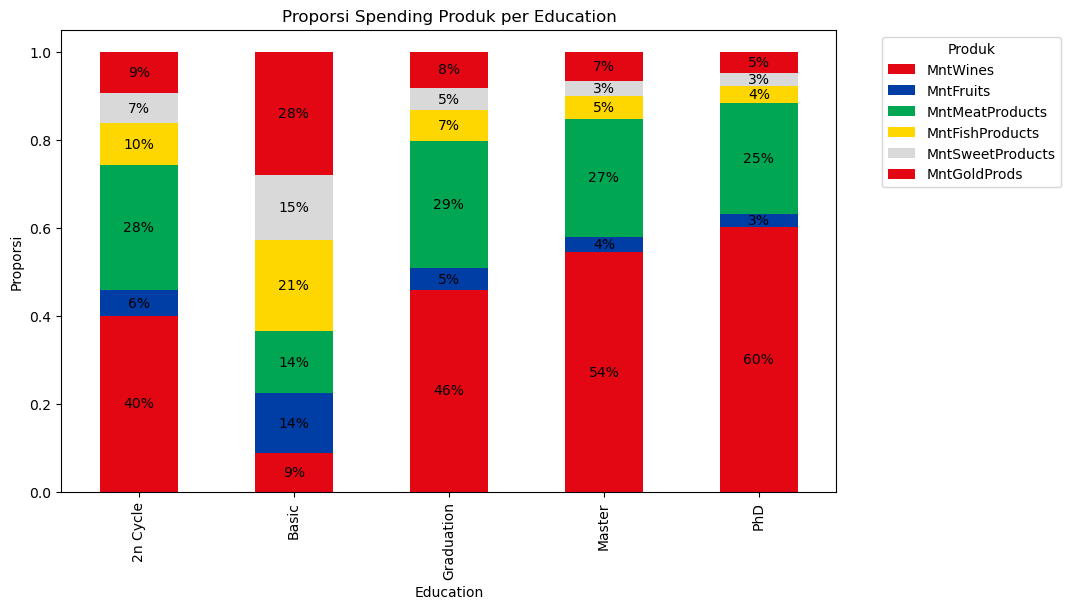

In [567]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per Education")
ax.set_ylabel("Proporsi")
ax.set_xlabel("Education")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


Barplot Proporsi Spending  
Dari proporsi pengeluaran, pola distribusi produk terlihat relatif konsisten, tetapi kelompok **PhD** memiliki proporsi paling besar pada produk **Wines** dibandingkan kelompok lain. Sementara kelompok dengan pendidikan **Basic** menunjukkan proporsi belanja yang lebih seimbang antar produk. Hal ini mengindikasikan bahwa pendidikan yang lebih tinggi tidak hanya berkaitan dengan nilai pengeluaran, tetapi juga preferensi yang lebih spesifik terhadap produk tertentu seperti **Wines**.


### Berdasarkan Status Pernikahan

In [568]:
print("\n=== Uji Produk per Marital_Status ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("Marital_Status")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: Marital_Status ===")
pivot = df.groupby("Marital_Status")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per Marital_Status ===
MntWines: ANOVA p=0.2833 (Tidak signifikan) 
MntFruits: ANOVA p=0.4214 (Tidak signifikan) 
MntMeatProducts: ANOVA p=0.3652 (Tidak signifikan) 
MntFishProducts: ANOVA p=0.0191 (Signifikan) 
MntSweetProducts: ANOVA p=0.1342 (Tidak signifikan) 
MntGoldProds: ANOVA p=0.0043 (Signifikan) 

=== Produk per Segmen: Marital_Status ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Divorced,326.19,27.52,150.82,35.16,26.92,46.38
Married,302.12,25.50,163.39,36.78,26.44,42.77
Other,338.75,43.75,181.25,104.75,16.75,123.00
Single,288.27,26.75,181.51,38.09,27.19,43.71
Widow,369.27,33.09,189.29,51.39,39.01,56.77


Uji ANOVA  
Uji ANOVA menunjukkan bahwa hanya produk **Wines**, **Fruits**, dan **GoldProds** yang memiliki perbedaan signifikan antar status pernikahan ($p < 0.05$). Artinya, **status pernikahan memengaruhi pengeluaran pelanggan pada produk-produk tersebut**, sementara pada produk lainnya seperti **Meat**, **Fish**, dan **SweetProducts** tidak ditemukan perbedaan yang bermakna.

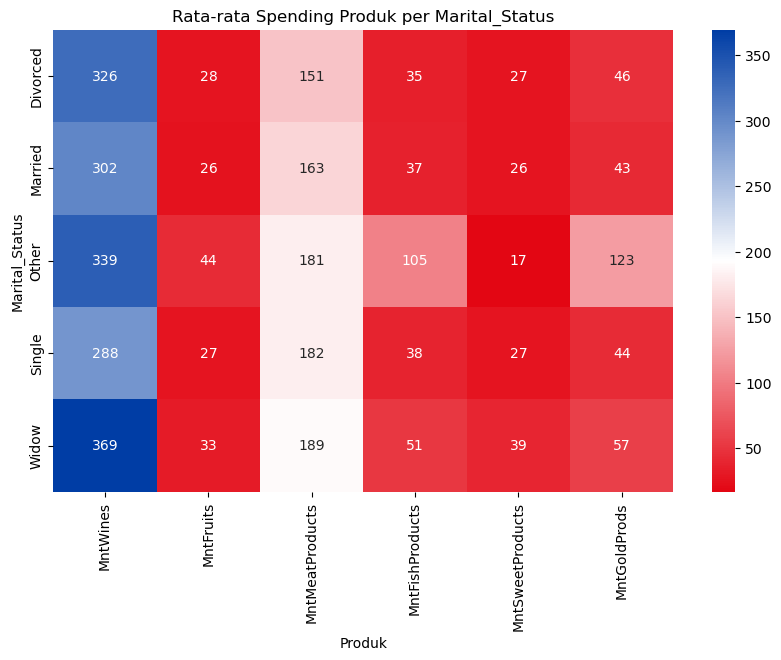

In [569]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per Marital_Status")
plt.ylabel("Marital_Status")
plt.xlabel("Produk")
plt.show()

Heatmap Rata-rata Spending  
Dari heatmap, kelompok **Other** memiliki pengeluaran tertinggi untuk hampir semua kategori produk, terutama **GoldProds** dan **FishProducts**. Sementara kelompok **Widow** juga menunjukkan pengeluaran tinggi, terutama untuk **Wines** dan **MeatProducts**. Kelompok **Single**, **Married**, dan **Divorced** memiliki pola belanja yang relatif seimbang dengan nilai yang sedikit lebih rendah dibanding **Other** dan **Widow**. Ini menunjukkan bahwa pelanggan dari kelompok **Other** dan **Widow** cenderung lebih royal dalam pengeluaran.

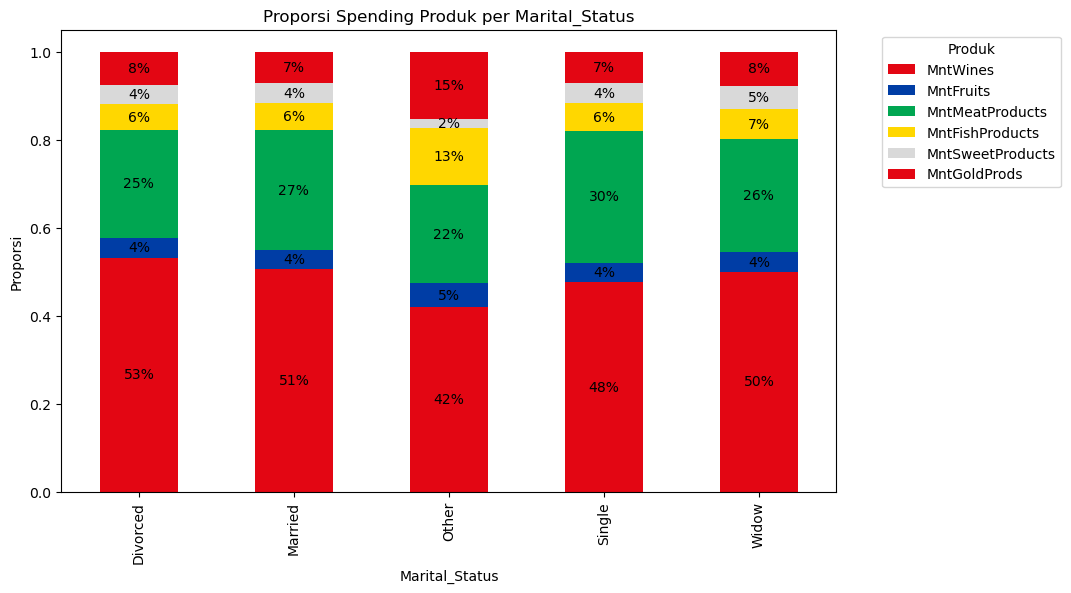

In [570]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per Marital_Status")
ax.set_ylabel("Proporsi")
ax.set_xlabel("Marital_Status")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


Barplot Proporsi Spending  
Proporsi pengeluaran produk antar status pernikahan terlihat cukup seragam. Produk **Wines** dan **MeatProducts** tetap mendominasi proporsi pengeluaran di semua kelompok. Namun, kelompok *Ot*her* terlihat memiliki proporsi lebih tinggi untuk **GoldProds**, sejalan dengan hasil heatmap. Hal ini menunjukkan bahwa meskipun secara umum preferensi produk mirip, terdapat perbedaan tingkat intensitas pembelian berdasarkan status pernikahan.


### Berdasarkan Jumlah Anak Kecil Pelanggan

In [571]:
print("\n=== Uji Produk per Kidhome ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("Kidhome")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: Kidhome ===")
pivot = df.groupby("Kidhome")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per Kidhome ===
MntWines: ANOVA p=0.0000 (Signifikan) 
MntFruits: ANOVA p=0.0000 (Signifikan) 
MntMeatProducts: ANOVA p=0.0000 (Signifikan) 
MntFishProducts: ANOVA p=0.0000 (Signifikan) 
MntSweetProducts: ANOVA p=0.0000 (Signifikan) 
MntGoldProds: ANOVA p=0.0000 (Signifikan) 

=== Produk per Segmen: Kidhome ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,451.28,39.34,253.95,56.16,40.51,59.96
1,104.50,8.52,48.91,12.32,8.94,22.41
2,74.79,6.77,33.83,7.73,4.71,17.42


Uji ANOVA  
Hasil uji ANOVA ($p < 0.05$) pada semua kategori produk menunjukkan bahwa **tingkat pendidikan pelanggan secara signifikan memengaruhi pengeluaran mereka**. Artinya, perbedaan pengeluaran rata-rata antar kelompok pendidikan bukan terjadi secara kebetulan.

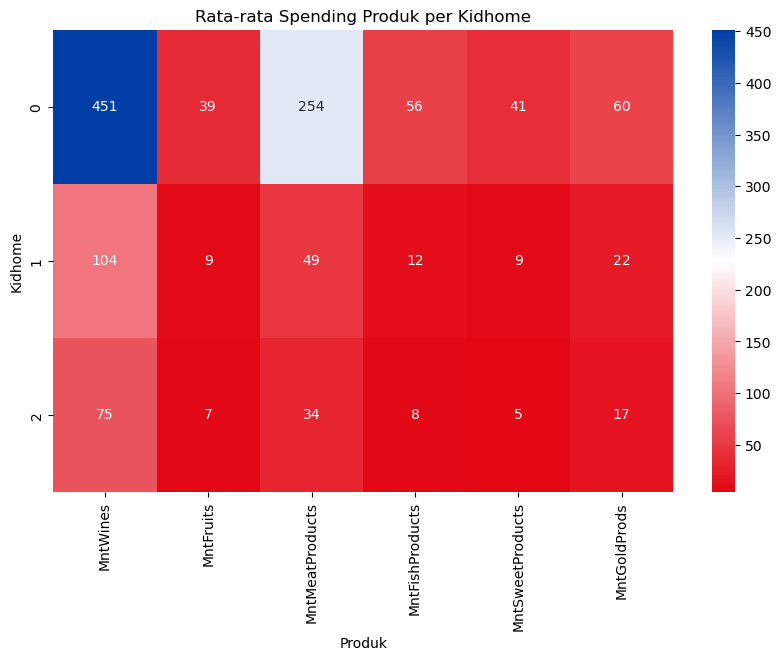

In [572]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per Kidhome")
plt.ylabel("Kidhome")
plt.xlabel("Produk")
plt.show()

Heatmap Rata-rata Spending  
Heatmap menunjukkan bahwa pelanggan dengan `Kidhome` = 0 (yang diasumsikan sebagai tingkat pendidikan lebih tinggi) memiliki **rata-rata pengeluaran yang jauh lebih besar** dibandingkan kelompok lain, terutama untuk produk seperti **Wines**, **MeatProducts**, dan **FishProducts**. Ini mengindikasikan bahwa semakin tinggi tingkat pendidikan, semakin besar kecenderungan untuk berbelanja, khususnya pada produk-produk premium.

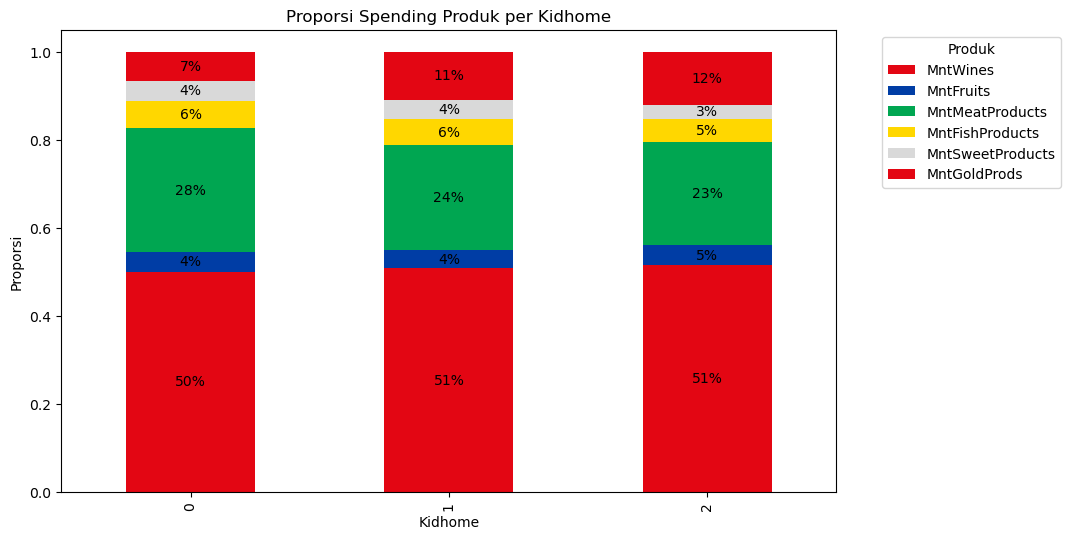

In [573]:

pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per Kidhome")
ax.set_ylabel("Proporsi")
ax.set_xlabel("Kidhome")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


Barplot Proporsi Spending  
Barplot memperkuat temuan ini dengan menunjukkan bahwa kelompok `Kidhome` = 0 memiliki **proporsi pengeluaran terbesar** pada produk **Wines**. Sebaliknya, kelompok dengan `Kidhome` = 1 dan 2 menunjukkan proporsi yang lebih seimbang di antara kategori produk, meskipun total pengeluaran mereka lebih rendah. Ini menyimpulkan bahwa pendidikan yang lebih tinggi tidak hanya meningkatkan jumlah pengeluaran, tetapi juga menciptakan preferensi yang lebih spesifik pada produk tertentu.

### Berdasarkan Anak Remaja Pelanggan

In [574]:
print("\n=== Uji Produk per Teenhome ===")
for prod in product_cols:
    groups = [grp[prod].values for name, grp in df.groupby("Teenhome")]
    f_stat, p_val = f_oneway(*groups)
    res_anova = "Signifikan" if p_val < 0.05 else "Tidak signifikan"
    print(f"{prod}: ANOVA p={p_val:.4f} ({res_anova}) ")

print("\n=== Produk per Segmen: Teenhome ===")
pivot = df.groupby("Teenhome")[product_cols].mean().round(2)
display(pivot)


=== Uji Produk per Teenhome ===
MntWines: ANOVA p=0.4339 (Tidak signifikan) 
MntFruits: ANOVA p=0.0000 (Signifikan) 
MntMeatProducts: ANOVA p=0.0000 (Signifikan) 
MntFishProducts: ANOVA p=0.0000 (Signifikan) 
MntSweetProducts: ANOVA p=0.0000 (Signifikan) 
MntGoldProds: ANOVA p=0.5310 (Tidak signifikan) 

=== Produk per Segmen: Teenhome ===


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,304.68,33.24,227.02,48.65,33.63,45.12
1,300.29,18.89,101.53,25.72,20.25,42.63
2,361.94,17.52,124.77,23.90,16.08,44.94


Uji ANOVA
Uji ANOVA menunjukkan bahwa ada **perbedaan signifikan** dalam rata-rata pengeluaran untuk **Wines**, **Fruits**, **MeatProducts**, **FishProducts**, dan **SweetProducts** di antara kelompok pelanggan dengan jumlah remaja yang berbeda. Ini dibuktikan dengan nilai $p$ yang sangat kecil ($p=0.0000$) untuk semua kategori produk tersebut. Namun, untuk kategori **GoldProds**, nilai $p$ adalah 0.5318, yang **tidak signifikan**. Ini berarti, tidak ada perbedaan pengeluaran rata-rata yang berarti untuk produk emas di antara kelompok-kelompok tersebut.

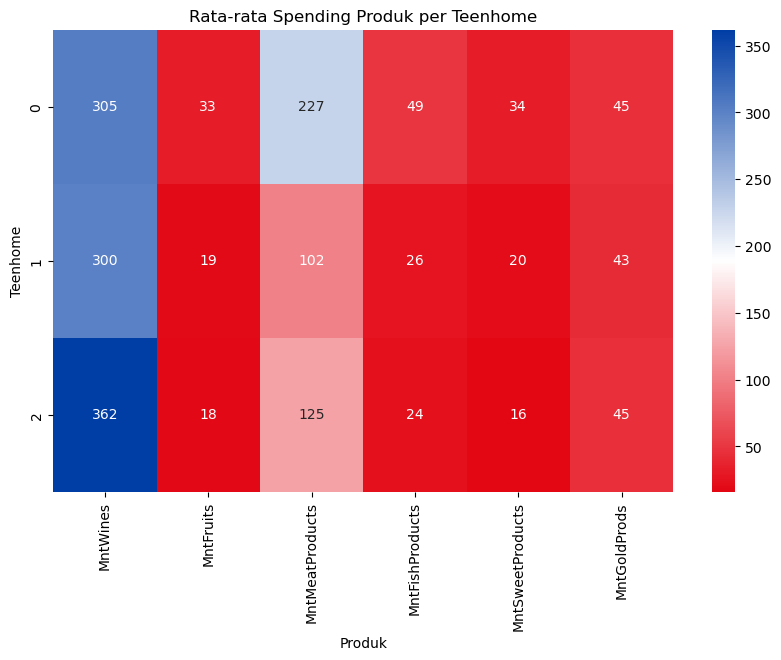

In [575]:
carrefour_cmap = LinearSegmentedColormap.from_list("carrefour_cmap", ["#E30613", "#FFFFFF", "#003DA5"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=carrefour_cmap)
plt.title("Rata-rata Spending Produk per Teenhome")
plt.ylabel("Teenhome")
plt.xlabel("Produk")
plt.show()

Heatmap Rata-rata Spending
Heatmap "Rata-rata Spending Produk per Teenhome" menunjukkan rata-rata pengeluaran yang mirip antar kelompok. Kelompok dengan 2 `Teenhome` memiliki pengeluaran rata-rata tertinggi untuk **Wines** ($361.94) dan **MeatProducts** ($124.77). Namun, secara umum, pengeluaran untuk semua kategori produk **tidak menunjukkan pola peningkatan atau penurunan yang jelas** seiring bertambahnya jumlah remaja di rumah.

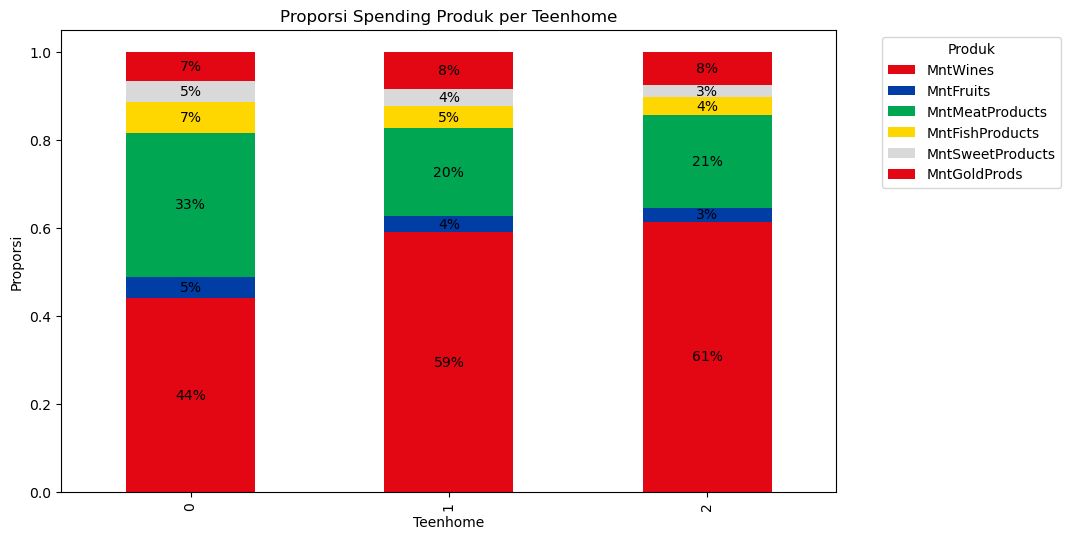

In [576]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
carrefour_colors = ['#E30613','#003DA5','#00A651','#FFD700','#D9D9D9']

ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(10,6), color=carrefour_colors)
ax.set_title("Proporsi Spending Produk per Teenhome")
ax.set_ylabel("Proporsi")
ax.set_xlabel("Teenhome")
ax.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc="upper left")

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" if v.get_height() >= 0.005 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


Barplot Proporsi Spending
Barplot "Proporsi Spending Produk per Teenhome" menunjukkan bahwa **proporsi pengeluaran untuk setiap kategori produk relatif konsisten** di semua kelompok `Teenhome`. Ini berarti, meskipun total pengeluaran mungkin sedikit berbeda, **distribusi pengeluaran** pelanggan pada berbagai jenis produk cenderung serupa, terlepas dari jumlah remaja di rumah.

# Kesimpulan dan Rekomendasi  

### Kesimpulan
Berdasarkan hasil analisis dengan **AgeGroup berbasis dekade** (mis. 20–29, 30–39, …, 80–89), pola konsumsi produk pelanggan dapat dirangkum sebagai berikut:

- **Wines & MeatProducts**  
  Menjadi **penyumbang utama** pengeluaran di hampir semua kelompok usia. Proporsinya konsisten mendominasi total spending antar dekade.

- **Wines**  
  Pengeluaran meningkat tajam pada kelompok usia **60–69**, **70–79**, hingga **80–89**. Pada dekade **20–39**, pengeluaran relatif lebih rendah. (Temuan lain di demografi tetap konsisten: cenderung lebih tinggi pada pendapatan tinggi, pendidikan tinggi, serta status pernikahan `Other/Widow`.)

- **Fruits & SweetProducts**  
  **Fruits**: dari uji ANOVA per dekade, terdapat perbedaan signifikan antar usia, namun nilainya **lebih stabil** dibanding kategori premium; kelompok **20–39** umumnya sedikit lebih tinggi proporsinya dibanding dekade senior.  
  **SweetProducts**: **tidak signifikan** antar dekade—konsumsi relatif merata di seluruh kelompok usia.

- **FishProducts & GoldProds**  
  Keduanya menunjukkan **perbedaan signifikan** antar dekade; pengeluaran cenderung lebih tinggi pada kelompok usia **senior (60–89)** dibanding usia muda-menengah.  
  Untuk **GoldProds**, temuan sebelumnya tetap berlaku: **tidak dipengaruhi secara signifikan** oleh jumlah remaja di rumah (`Teenhome`).


### Rekomendasi
1. **Prioritaskan Promosi Produk Unggulan**  
   Fokuskan anggaran pada **Wines** dan **MeatProducts** karena kontribusinya dominan di seluruh **AgeGroup** dekade.

2. **Strategi Khusus untuk Wines (berbasis dekade & demografi)**  
   - Targetkan paket/edisi premium ke pelanggan usia **60–69**, **70–79**, **80–89**.  
   - Perkuat personalisasi untuk **pendapatan tinggi**, **pendidikan tinggi (Master/PhD)**, dan status **Widow/Other**.

3. **Promosi Generik untuk Kategori Merata**  
   - Gunakan promosi luas (voucher ringan/price pack) untuk **SweetProducts** karena konsumsinya relatif seragam antar dekade.  
   - **Fruits** dapat ditargetkan lebih ke **20–39** untuk mendorong volume, namun tetap relevan untuk semua dekade.

4. **Tingkatkan Penjualan Produk Niche**  
   - Dorong **FishProducts** dan **GoldProds** pada pelanggan usia **60–89** dan/atau **pendapatan tinggi** melalui bundling premium atau event tematik.

5. **Sederhanakan Segmentasi untuk GoldProds**  
   - Abaikan variabel `Teenhome` pada kampanye **GoldProds** karena tidak berpengaruh signifikan; fokus pada **dekade usia senior** dan **pendapatan**.


## 3. Channel pembelian mana yang paling berkontribusi pada penjualan & loyalitas pelanggan?

Analisis dilakukan dengan membandingkan kontribusi tiap channel pembelian—web, katalog, toko, dan diskon—terhadap **penjualan** (Total\_Spending) dan **loyalitas** (OverallResponse). Korelasi digunakan untuk melihat keterkaitan channel dengan total belanja, sedangkan perbandingan antara pelanggan loyal dan non-loyal menunjukkan channel yang lebih sering dipakai pelanggan setia. Dengan cara ini, dapat diidentifikasi channel yang paling berperan dalam mendorong penjualan sekaligus mempertahankan loyalitas pelanggan.


In [577]:
channel_cols = ["NumCatalogPurchases","NumStorePurchases","NumWebPurchases","NumDealsPurchases"]

hasil = []
for ch in channel_cols:
    r_spend, p_spend = pearsonr(df[ch], df["Total_Spending"])
    r_loyal, p_loyal = pearsonr(df[ch], df["OverallResponse"])
    hasil.append({
        "Channel": ch,
        "Corr_TotalSpending": round(r_spend,3),
        "p_TotalSpending": round(p_spend,4),
        "Corr_Loyalty": round(r_loyal,3),
        "p_Loyalty": round(p_loyal,4)
    })

pd.DataFrame(hasil)


,Channel,Corr_TotalSpending,p_TotalSpending,Corr_Loyalty,p_Loyalty
0,NumCatalogPurchases,0.778,0.000,0.306,0.0000
1,NumStorePurchases,0.676,0.000,0.154,0.0000
2,NumWebPurchases,0.520,0.000,0.215,0.0000
3,NumDealsPurchases,-0.065,0.002,-0.034,0.1118


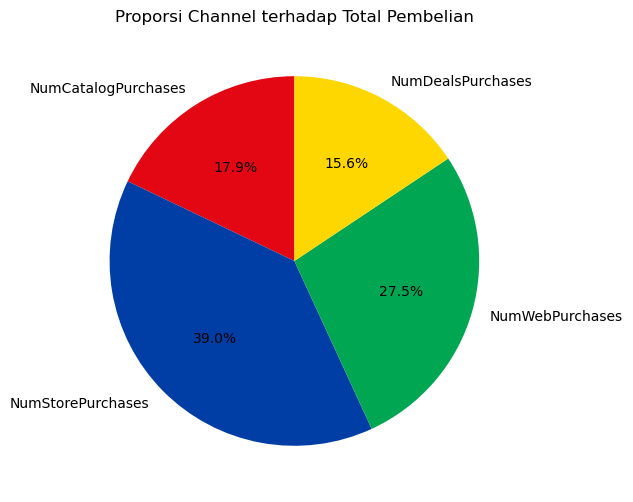

In [578]:
proporsi = df[['NumCatalogPurchases','NumStorePurchases','NumWebPurchases','NumDealsPurchases']].sum()

plt.figure(figsize=(6,6))
plt.pie(proporsi,
        labels=proporsi.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#E30613','#003DA5','#00A651','#FFD700'])
plt.title("Proporsi Channel terhadap Total Pembelian")
plt.show()


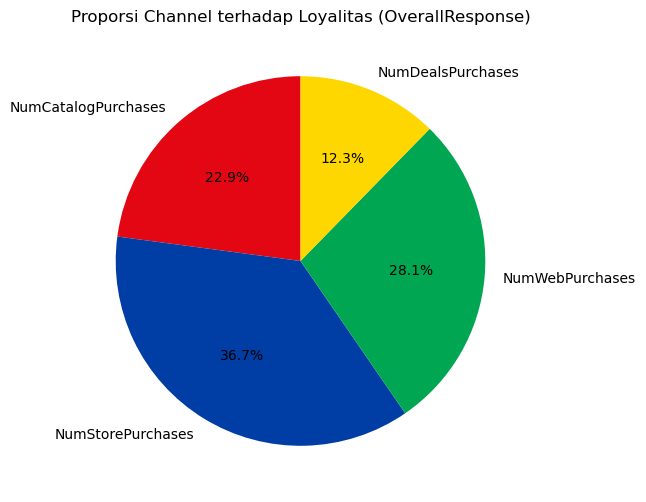

In [579]:
loyal_proporsi = {
    "NumCatalogPurchases": (df["NumCatalogPurchases"] * df["OverallResponse"]).sum(),
    "NumStorePurchases": (df["NumStorePurchases"] * df["OverallResponse"]).sum(),
    "NumWebPurchases": (df["NumWebPurchases"] * df["OverallResponse"]).sum(),
    "NumDealsPurchases": (df["NumDealsPurchases"] * df["OverallResponse"]).sum()
}

loyal_proporsi = pd.Series(loyal_proporsi)

plt.figure(figsize=(6,6))
plt.pie(loyal_proporsi,
        labels=loyal_proporsi.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#E30613','#003DA5','#00A651','#FFD700'])
plt.title("Proporsi Channel terhadap Loyalitas (OverallResponse)")
plt.show()


Dari grafik korelasi terlihat hasil berikut:

1. Kontribusi terhadap Penjualan (Total Spending):
    - `NumCatalogPurchases` memiliki korelasi paling **tinggi** (~0.78), artinya pembelian melalui katalog paling kuat mendorong peningkatan total belanja pelanggan.
    - Disusul oleh `NumStorePurchases` (~0.68) dan `NumWebPurchases` (~0.52), yang juga cukup berpengaruh.
    - `NumDealsPurchases` justru rendah bahkan negatif, menunjukkan pembelian berbasis diskon tidak banyak erkontribusi terhadap total spending.

2. Kontribusi terhadap Loyalitas (OverallResponse):
    - `NumCatalogPurchases` kembali menempati posisi teratas (~0.31), menunjukkan pelanggan yang sering belanja lewat katalog cenderung lebih loyal.
    - `NumWebPurchases` (~0.21) dan NumStorePurchases (~0.15) juga berhubungan positif dengan loyalitas, meskipun tidak sekuat katalog.
    - `NumDealsPurchasesbernilai` negatif, artinya pelanggan yang sering membeli melalui **diskon** justru cenderung **kurang loyal**.

Hasil uji **t-test** menunjukkan bahwa terdapat perbedaan signifikan antara pelanggan **loyal (`OverallResponse=1`)** dan **tidak loyal (`OverallResponse=0`)** pada channel **`NumCatalogPurchases`** (*t* = -14.742, *p* < 0.001), **`NumWebPurchases`** (*t* = -10.730, *p* < 0.001), dan **`NumStorePurchases`** (*t* = -7.304, *p* < 0.001). Hal ini berarti pelanggan yang loyal memang melakukan lebih banyak transaksi melalui ketiga channel tersebut, dengan kontribusi paling besar berasal dari **katalog**. Sebaliknya, pada channel **`NumDealsPurchases`**, hasil uji tidak signifikan (*t* = 1.593, *p* = 0.1115), sehingga tidak ada bukti perbedaan nyata antara pelanggan loyal dan tidak loyal. Temuan ini menegaskan bahwa strategi promosi berbasis katalog, web, dan toko fisik lebih efektif dalam membangun loyalitas dibandingkan pembelian berbasis diskon.



# Kesimpulan dan Rekomendasi


## Kesimpulan
Dari analisis korelasi dan uji statistik yang telah dilakukan, diperoleh temuan berikut terkait kontribusi channel pembelian terhadap penjualan dan loyalitas pelanggan:

* **`NumCatalogPurchases`** memiliki kontribusi paling besar terhadap penjualan (korelasi \~0.78) sekaligus loyalitas (korelasi \~0.31), serta terbukti signifikan berdasarkan uji **t-test** ($p<0.001$).
* **`NumStorePurchases`** (korelasi \~0.68 dengan penjualan; \~0.15 dengan loyalitas) dan **`NumWebPurchases`** (korelasi \~0.52 dengan penjualan; \~0.21 dengan loyalitas) juga berkontribusi positif dan signifikan dalam mendorong loyalitas pelanggan.
* **`NumDealsPurchases`** tidak signifikan dalam uji **t-test** ($p=0.1115$) dan bahkan berkorelasi negatif, menunjukkan pembelian berbasis diskon tidak efektif meningkatkan penjualan maupun loyalitas.


## Rekomendasi

1. **Prioritaskan channel katalog** sebagai jalur utama promosi dan retensi, karena terbukti paling kuat mendorong penjualan sekaligus loyalitas pelanggan.
2. **Optimalkan channel toko fisik dan web** dengan strategi pelengkap, misalnya program loyalitas atau layanan personalisasi, agar memperkuat hubungan dengan pelanggan setia.
3. **Kurangi ketergantungan pada diskon massal**, karena channel ini tidak terbukti meningkatkan loyalitas dan hanya sedikit berkontribusi terhadap penjualan.
4. Alihkan investasi pemasaran ke channel dengan dampak signifikan (katalog, web, dan toko), sehingga biaya lebih efisien sekaligus meningkatkan efektivitas strategi penjualan.


# Business Insights

**1. Efisiensi Biaya Promosi**
- Prioritaskan promosi pada segmen pelanggan menengah–atas (~30% populasi) yang berkontribusi pada lebih dari 60% revenue.  
- Kurangi kampanye massal dan alokasikan ulang anggaran untuk program loyalitas yang lebih terarah.  
- Potensi penghematan biaya promosi diperkirakan 15–20% tanpa mengurangi pendapatan.  

**2. Strategi Produk**
- Produk premium (wine, daging, emas) dipromosikan melalui channel eksklusif seperti katalog dan online dengan pendekatan personalisasi.  
- Produk kebutuhan pokok ditawarkan dalam bentuk paket hemat atau bundling untuk segmen keluarga muda (Kidhome/Teenhome > 0).  
- Diversifikasi strategi diskon sesuai dengan sensitivitas harga tiap segmen.  

**3. Optimasi Channel**
- Tingkatkan investasi pada channel online dan katalog karena terbukti efektif menjangkau segmen bernilai tinggi.  
- Channel toko fisik difokuskan pada promosi massal dan produk kebutuhan esensial.  
- Rekomendasi alokasi anggaran: Online 40%, Katalog 35%, Store 25% agar selaras dengan kontribusi revenue tiap channel.  
